# Restaurants & Cafes Location Analysis in Singapore

## Table of Content

### Week 1
### Part 1: Background and Description of the Problem
- 1.A Background    
- 1.B Description of the Problem

### Part 2: Data Description and How it Will Solve the Problem
- 2.A Data Description
- 2.B How it Will Solve the Problem

### Week 2
### Part 3: Codes for Data Extraction and Analysis
- 3.A Extract Singapore Neighborhood Data
- 3.B Get Coordinates from Wikipedia and Geocoder
- 3.C Use Foursquare API to Get Business Venues
- 3.D Cluster Singapore Neighborhood for General Analysis
- 3.E Detailed Study for One Particular Business

# Main Content: Week 1

## Part 1: Background and Description of the Problem

### 1.A Background

Singapore is a well developed city-state located in South East Asia. Well known as the main financial and logistic hub of the region, various businesses continue to develop here. This opportunity attracts various culinary businesess like food courts, restaurants, dessert stalls, and cafes to set up their shops here. However, the growing number and diversity of culinary businesses in Singapore is so overwhelming, so that a new culinary entrepreneur will need to perform serious initial feasibility study to carefully plan their growing business. Every new culinary entrepreneur will need to analyze potential customers to make sure that their business can grow. Apart from that, they also need to consider potential competitive businesses that may drive them out of the culinary business competition.

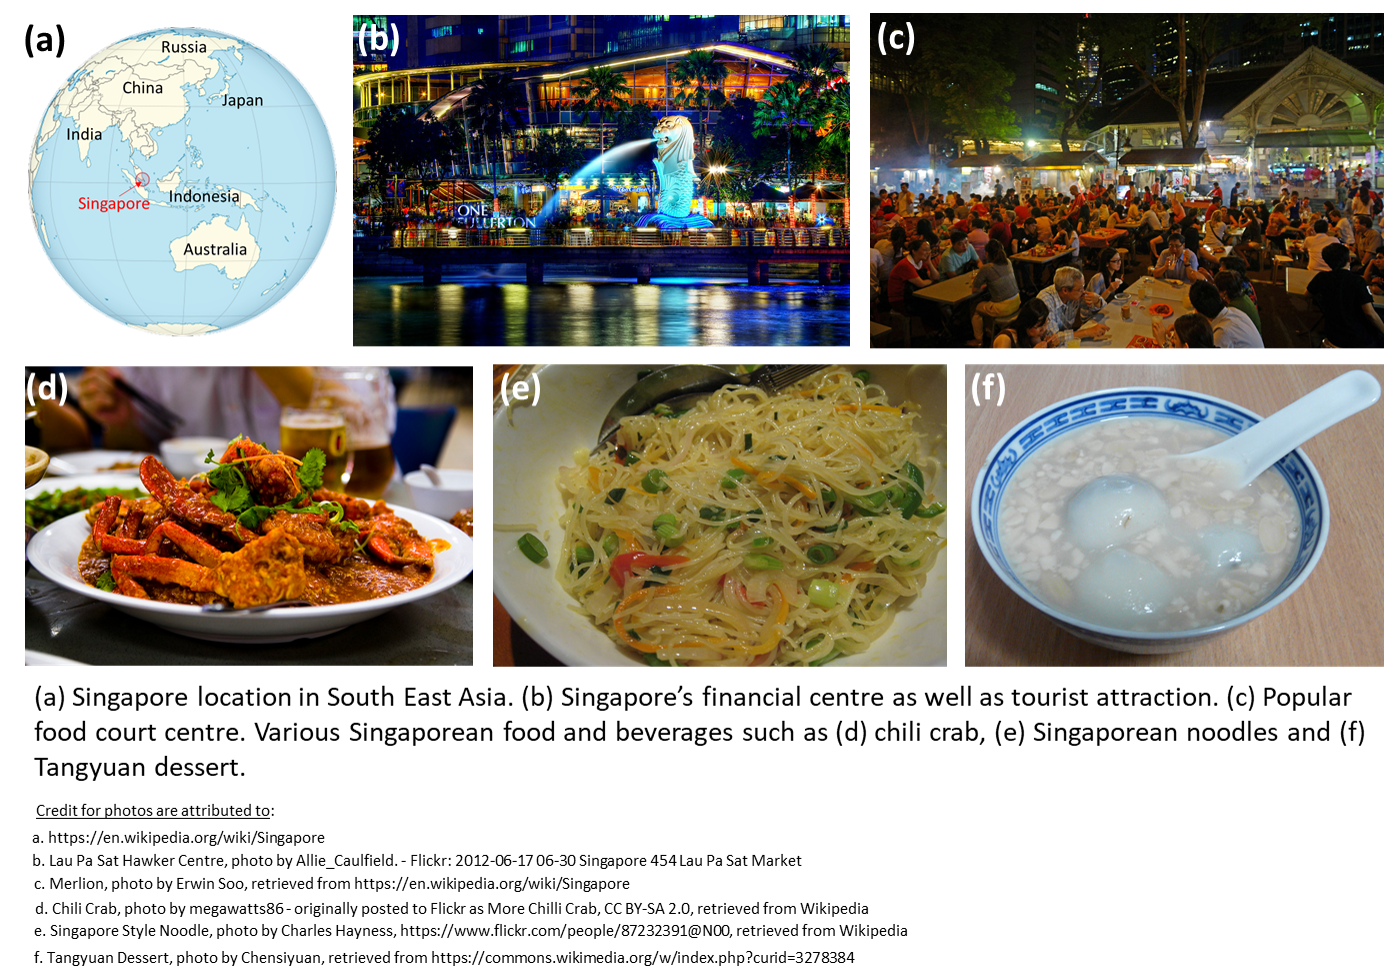

In [1]:
from IPython.display import Image
Image("Singapore introduction.png")

### 1.B Description of the Problem

In summary, the target audience is:     
- **culinary entrepreneurs (food courts, restaurants, fast food joint, cafes etc)**, who want to open a new business.

Problems to investigate:
- **Where to open their new business?**
- **How many is their potential customers?**
- **What kind of competitors they may face?**

Why would our target audience care:     
- **They need to decide a place to start their business.**    
- **Without selecting the correct place, they may fail to get customers.**   
- **Without customers nobody buys their products.**   
- **Also, they need to differentiate themselves from competitors.**   

## Part 2: Data Description and How it Will Solve the Problem

### 2.A Data Description

There are several main dataset we will collect:
- **Zones and Coordinates Info for Each Location in Singapore**
- **Population Counts for Each Zones**
- **Venues Category and Counts for Each Zones**

### 2.B How it Will Solve the Problem

Zones and Coordinate Info for Each Location in Singapore can be used to identify location of various neighborhood in this city. Subsequently, we want to collect population counts for each zones. Regions, with high population counts may provide our target audience (culinary entrepreneur) who want to leverage large number of customers. Subsequently, we want to collect data about various venues culinary or non-culinary using Foursquare API.

If it is non-culinary, it is of interest to our target audience since it is possible to pair our culinary product with those venues. For example healthy food stall may be a good pair around sport stadium and cafe may be a good pair with library. 

If it is culinary, it is also important to decide whether they are in the same category or not. If we want to open a ramen shop, we must check not only the presence of other ramen shop, but also udon, noodles, pasta etc. On the other hand, it may be okay if the other venues are selling different kinds of food. Using data that we can obtain using Foursquare API, we can help to provide a dataset that can help our customer to investigate and decide where to open up their venue.

# Main Content: Week 2

## Part 3: Codes for Data Extraction and Analysis

"Planning Areas, also known as DGP areas or DGP zones, are the main urban planning and census divisions of Singapore delineated by the Urban Redevelopment Authority. There are a total of 55 of these areas, organised into five regions. A Development Guide Plan is then drawn up for each planning area, providing for detailed planning guidelines for every individual plot of land throughout the country."
Reference from: https://eresources.nlb.gov.sg/infopedia/articles/SIP_1371_2009-01-05.html

DGP = Development guide plans (DGPs)

Unlike the postal sectors division, a clear map that delineate the divisions between DGP zones is more readily understood, as can be inspected here:
'https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore'

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
linkB = 'https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore'

webpageB = requests.get(linkB)

soupB = BeautifulSoup(webpageB.content,'lxml')

In [4]:
#print(soupB.prettify)

In [5]:
soupB_wikitable = soupB.find(attrs={"class": "wikitable sortable"})
soupB_wikitable

<table class="wikitable sortable">
<tbody><tr>
<th>Name <small>(<a href="/wiki/English_language" title="English language">English</a>)</small>
</th>
<th><a href="/wiki/Malay_language" title="Malay language">Malay</a>
</th>
<th><a href="/wiki/Chinese_language" title="Chinese language">Chinese</a>
</th>
<th><a href="/wiki/Pinyin" title="Pinyin">Pinyin</a>
</th>
<th><a href="/wiki/Tamil_language" title="Tamil language">Tamil</a>
</th>
<th>Region
</th>
<th>Area (km2)
</th>
<th>Population<sup class="reference" id="cite_ref-7"><a href="#cite_note-7">[7]</a></sup>
</th>
<th>Density (/km2)
</th></tr>
<tr>
<td><a href="/wiki/Ang_Mo_Kio" title="Ang Mo Kio">Ang Mo Kio</a>
</td>
<td>
</td>
<td>宏茂桥
</td>
<td>Hóng mào qiáo
</td>
<td>ஆங் மோ கியோ
</td>
<td><a href="/wiki/North-East_Region,_Singapore" title="North-East Region, Singapore">North-East</a>
</td>
<td>13.94
</td>
<td>165,710
</td>
<td>12,000
</td></tr>
<tr>
<td><a href="/wiki/Bedok" title="Bedok">Bedok</a>
</td>
<td>*
</td>
<td>勿洛
</td>
<td>

In [6]:
tableB_entry_list = soupB_wikitable.findAll('a')
#tableB_entry_list

In [7]:
numberB_rows = len(tableB_entry_list)
numberB_rows

116

In [8]:
# Collect zones name and zones link from the soupB object.
zones_list = []
zones_links_list = []
for index in range(6, numberB_rows, 1):
    if index % 2 == 0:
        zone = tableB_entry_list[index].get_text()
        zones_list.append(zone)
        urlx = str(tableB_entry_list[index])
        urlx = urlx.split('title')
        urlx = urlx[0]
        urlx = urlx.split('"')
        urlx = urlx[1]
        #zone_area_i =  
        zones_links_list.append(urlx)

In [9]:
tableC_entry_list_area_population = soupB_wikitable.findAll('td')
tableC_entry_list_area_population
numberC_rows = len(tableC_entry_list_area_population)
numberC_rows

495

In [10]:
zones_area_list = []
zones_population_list = []
for index in range(0, numberC_rows, 1):
    #print(index)
    #print(tableC_entry_list_area_population[index])
    if (index-6)%9 == 0:
        areas = tableC_entry_list_area_population[index]
        areas = str(areas.get_text())
        areas = areas.strip('\n')
        areas = float(areas)
        zones_area_list.append(areas)
        #print('areas= ', areas)
    if (index-6)%9 == 1:
        population = tableC_entry_list_area_population[index]
        population = str(population.get_text())
        population = population.strip('\n')
        if population == '*':
            population = int(0)
        else:
            try:
                population = population.split(',')
                population = population[0] + population[1]
            except:
                pass
        if type(population) == list:
            population = population[0]
        population = int(population)
        #print(population)
        #print(type(population))
        zones_population_list.append(population)

In [11]:
# example of zones name
print(zones_list[0:10])

['Ang Mo Kio', 'Bedok', 'Bishan', 'Boon Lay', 'Bukit Batok', 'Bukit Merah', 'Bukit Panjang', 'Bukit Timah', 'Central Water Catchment', 'Changi']


In [12]:
# example of zones wikipedia link
print(zones_links_list[0:10])

['/wiki/Ang_Mo_Kio', '/wiki/Bedok', '/wiki/Bishan,_Singapore', '/wiki/Boon_Lay_Planning_Area', '/wiki/Bukit_Batok', '/wiki/Bukit_Merah', '/wiki/Bukit_Panjang', '/wiki/Bukit_Timah', '/wiki/Central_Water_Catchment', '/wiki/Changi']


In [13]:
# example of zones area
zones_area_list[0:10]

[13.94, 21.69, 7.62, 8.23, 11.13, 14.34, 8.99, 17.53, 37.15, 40.61]

In [14]:
# example of population number:
print(zones_population_list[0:10])

[165710, 281300, 88490, 30, 144410, 151870, 140820, 77280, 0, 2080]


In [15]:
# Collect latitude and longitude from wikipedia, if it is available.
# If not available, put 'NaN'.

latitude_list = []
longitude_list = []
postal_district_list = []
for index in range(0, len(zones_links_list), 1):
    link_wikipedia = 'https://en.wikipedia.org'
    link_zone = zones_links_list[index]
    link_wiki_zone = link_wikipedia + link_zone
    print(link_wiki_zone)
    try:
        webpage = requests.get(link_wiki_zone)
        soup_zone = BeautifulSoup(webpage.content,'lxml')
        lat = soup_zone.find(attrs={"class": "latitude"}).get_text()
        lon = soup_zone.find(attrs={"class": "longitude"}).get_text()
        postal_district = soup_zone.find(attrs={"class": "postal-code"}).get_text()
    except:
        lat = 'NaN'
        lon = 'NaN'
        postal_district = 'NaN'
    print(lat)
    print(lon)
    print(postal_district)
    latitude_list.append(lat)
    longitude_list.append(lon)
    postal_district_list.append(postal_district)

https://en.wikipedia.org/wiki/Ang_Mo_Kio
1°22′12.6″N
103°50′44.23″E
20
https://en.wikipedia.org/wiki/Bedok
1°19′24.96″N
103°55′38.42″E
16
https://en.wikipedia.org/wiki/Bishan,_Singapore
1°21′3″N
103°51′5″E
20
https://en.wikipedia.org/wiki/Boon_Lay_Planning_Area
NaN
NaN
NaN
https://en.wikipedia.org/wiki/Bukit_Batok
1°21′32.51″N
103°45′49.25″E
21, 23
https://en.wikipedia.org/wiki/Bukit_Merah
1°16′54.86″N
103°49′26.11″E
2, 3, 4, 5, 9, 10
https://en.wikipedia.org/wiki/Bukit_Panjang
1°22′51.00″N
103°45′45.00″E
21, 23
https://en.wikipedia.org/wiki/Bukit_Timah
1°19′45.88″N
103°48′7.48″E
10, 11, 21
https://en.wikipedia.org/wiki/Central_Water_Catchment
01°22′N
103°48′E
25
https://en.wikipedia.org/wiki/Changi
1°20′42″N
103°58′59.5″E
17
https://en.wikipedia.org/wiki/Changi_Bay
NaN
NaN
NaN
https://en.wikipedia.org/wiki/Choa_Chu_Kang
1°23′N
103°45′E
23
https://en.wikipedia.org/wiki/Clementi,_Singapore
1°18′58.25″N
103°45′53.78″E
5, 21
https://en.wikipedia.org/wiki/Downtown_Core
1°17′12″N
103°51′13″

In [145]:
# Create dataframe from the coordinates we collected
dictXY = {'DGP zones':zones_list, 'zone_links':zones_links_list, 'latitude': latitude_list, 'longitude':longitude_list, 
         'postal districts':postal_district_list}
df_zone_SG = pd.DataFrame.from_dict(dictXY)
df_zone_SG.head(55)

DGP zones                        zone_links      latitude  \
0                Ang Mo Kio                  /wiki/Ang_Mo_Kio   1°22′12.6″N   
1                     Bedok                       /wiki/Bedok  1°19′24.96″N   
2                    Bishan           /wiki/Bishan,_Singapore      1°21′3″N   
3                  Boon Lay      /wiki/Boon_Lay_Planning_Area           NaN   
4               Bukit Batok                 /wiki/Bukit_Batok  1°21′32.51″N   
5               Bukit Merah                 /wiki/Bukit_Merah  1°16′54.86″N   
6             Bukit Panjang               /wiki/Bukit_Panjang  1°22′51.00″N   
7               Bukit Timah                 /wiki/Bukit_Timah  1°19′45.88″N   
8   Central Water Catchment     /wiki/Central_Water_Catchment       01°22′N   
9                    Changi                      /wiki/Changi     1°20′42″N   
10               Changi Bay                  /wiki/Changi_Bay           NaN   
11            Choa Chu Kang               /wiki/Choa_Chu_Kang        1°23′N   
12                 Clementi         /wiki/Clementi,_Singapore  1°18′58.25″N   
13            Downtown Core               /wiki/Downtown_Core     1°17′12″N   
14                  Geylang                     /wiki/Geylang     1°19′14″N   
15                  Hougang                     /wiki/Hougang   1°22′18.4″N   
16              Jurong East                 /wiki/Jurong_East  1°19′43.98″N   
17              Jurong West                 /wiki/Jurong_West     1°20′23″N   
18                  Kallang                     /wiki/Kallang     1°18′39″N   
19             Lim Chu Kang                /wiki/Lim_Chu_Kang       01°25′N   
20                   Mandai                      /wiki/Mandai     1°24′42″N   
21              Marina East                 /wiki/Marina_East           NaN   
22             Marina South                /wiki/Marina_South           NaN   
23            Marine Parade               /wiki/Marine_Parade     1°18′11″N   
24                   Museum        /wiki/Museum_Planning_Area   1°17′47.8″N   
25                   Newton           /wiki/Newton,_Singapore   1°18′25.8″N   
26    North-Eastern Islands       /wiki/North-Eastern_Islands           NaN   
27                   Novena           /wiki/Novena,_Singapore  1°19′15.09″N   
28                  Orchard                       mw-redirect           NaN   
29                   Outram           /wiki/Outram,_Singapore    1°17′5.6″N   
30                Pasir Ris                   /wiki/Pasir_Ris  1°22′19.54″N   
31               Paya Lebar                  /wiki/Paya_Lebar           NaN   
32                  Pioneer          /wiki/Pioneer,_Singapore           NaN   
33                  Punggol                     /wiki/Punggol   1°23′53.8″N   
34               Queenstown       /wiki/Queenstown,_Singapore     1°17′39″N   
35             River Valley     /wiki/River_Valley,_Singapore           NaN   
36                   Rochor                      /wiki/Rochor   1°18′18.4″N   
37                  Seletar                     /wiki/Seletar   1°24′19.2″N   
38                Sembawang                   /wiki/Sembawang           NaN   
39                 Sengkang                    /wiki/Sengkang     1°23′30″N   
40                Serangoon                   /wiki/Serangoon  1°21′19.28″N   
41                  Simpang                     /wiki/Simpang           NaN   
42          Singapore River             /wiki/Singapore_River           NaN   
43         Southern Islands            /wiki/Southern_Islands           NaN   
44             Straits View                /wiki/Straits_View           NaN   
45             Sungei Kadut                /wiki/Sungei_Kadut    1°25′4.8″N   
46                 Tampines                    /wiki/Tampines  1°20′58.53″N   
47                  Tanglin                     /wiki/Tanglin           NaN   
48                   Tengah           /wiki/Tengah,_Singapore           NaN   
49                Toa Payoh                   /wiki/Toa_Payoh   1°20

In [17]:
# Create and test functions to convert coordinate values in degree, minute, second (DMS) format to decimal format

def latitude_DMS_to_decimal(latx):
    if latx == 'NaN':
        return 'NaN'
    # get north or south
    sign_lat_DMS = latx[-1]
    if sign_lat_DMS == 'N':
        sign_lat_decimal = 1
    elif sign_lat_DMS == 'S':
        sign_lat_decimal = -1
    # get degree
    lat_degree = latx.split('°')
    lat_degree = lat_degree[0]
    # get minute
    lat_minute = latx.split('°')
    lat_minute = lat_minute[1]
    lat_minute = lat_minute.split("′")
    lat_minute = lat_minute[0]
    # get_second
    lat_second = latx.split('′')
    lat_second = lat_second[1]
    lat_second = lat_second.split('″')
    lat_second = lat_second[0]
    # if second not defined
    if lat_second == latx[-1]:
        lat_second = '0'
    # get magnitude of latitude
    #print(latx)
    #print(lat_degree)
    #print(lat_minute)
    #print(lat_second)
    mag_lat_decimal = float(lat_degree) + float(lat_minute)/60 + float(lat_second)/3600
    # get latitude in decimal
    lat_decimal = sign_lat_decimal*mag_lat_decimal
    return lat_decimal

# result = latitude_DMS_to_decimal('112°22′12.6″S')  
# print(result)
# result = latitude_DMS_to_decimal('NaN')  
# print(result)


def longitude_DMS_to_decimal(lonx):
    if lonx == 'NaN':
        return 'NaN'
    # get north or south
    sign_lon_DMS = lonx[-1]
    if sign_lon_DMS == 'E':
        sign_lon_decimal = 1
    elif sign_lon_DMS == 'W':
        sign_lon_decimal = -1
    # get degree
    lon_degree = lonx.split('°')
    lon_degree = lon_degree[0]
    # get minute
    lon_minute = lonx.split('°')
    lon_minute = lon_minute[1]
    lon_minute = lon_minute.split("′")
    lon_minute = lon_minute[0]
    # get_second
    lon_second = lonx.split('′')
    lon_second = lon_second[1]
    lon_second = lon_second.split('″')
    lon_second = lon_second[0]
    # if second not defined
    if lon_second == lonx[-1]:
        lon_second = '0'
    # get magnitude of longitude
    mag_lon_decimal = float(lon_degree) + float(lon_minute)/60 + float(lon_second)/3600
    # get longitude in decimal
    lon_decimal = sign_lon_decimal*mag_lon_decimal
    return lon_decimal

# result = longitude_DMS_to_decimal('103°50′44.23″W')  
# print(result)
# result = longitude_DMS_to_decimal('NaN')  
# print(result)

In [18]:
df_zone_SG['latitude']= df_zone_SG['latitude'].apply(latitude_DMS_to_decimal)
df_zone_SG['latitude'][0:5]

0    1.37017
1     1.3236
2    1.35083
3        NaN
4    1.35903
Name: latitude, dtype: object

In [19]:
df_zone_SG['longitude']= df_zone_SG['longitude'].apply(longitude_DMS_to_decimal)
df_zone_SG['longitude'][0:5]

0    103.846
1    103.927
2    103.851
3        NaN
4    103.764
Name: longitude, dtype: object

In [144]:
df_zone_SG.head(55)

DGP zones                     zone_links latitude longitude  \
0                Ang Mo Kio               /wiki/Ang_Mo_Kio  1.37017   103.846   
1                     Bedok                    /wiki/Bedok   1.3236   103.927   
2                    Bishan        /wiki/Bishan,_Singapore  1.35083   103.851   
4               Bukit Batok              /wiki/Bukit_Batok  1.35903   103.764   
5               Bukit Merah              /wiki/Bukit_Merah  1.28191   103.824   
6             Bukit Panjang            /wiki/Bukit_Panjang  1.38083   103.763   
7               Bukit Timah              /wiki/Bukit_Timah  1.32941   103.802   
8   Central Water Catchment  /wiki/Central_Water_Catchment  1.36667     103.8   
9                    Changi                   /wiki/Changi    1.345   103.983   
11            Choa Chu Kang            /wiki/Choa_Chu_Kang  1.38333    103.75   
12                 Clementi      /wiki/Clementi,_Singapore  1.31618   103.765   
13            Downtown Core            /wiki/Downtown_Core  1.28667   103.854   
14                  Geylang                  /wiki/Geylang  1.32056   103.887   
15                  Hougang                  /wiki/Hougang  1.37178   103.893   
16              Jurong East              /wiki/Jurong_East  1.32888    103.74   
17              Jurong West              /wiki/Jurong_West  1.33972   103.704   
18                  Kallang                  /wiki/Kallang  1.31083   103.866   
19             Lim Chu Kang             /wiki/Lim_Chu_Kang  1.41667     103.7   
20                   Mandai                   /wiki/Mandai  1.41167   103.786   
23            Marine Parade            /wiki/Marine_Parade  1.30306   103.908   
24                   Museum     /wiki/Museum_Planning_Area  1.29661   103.849   
25                   Newton        /wiki/Newton,_Singapore  1.30717   103.837   
27                   Novena        /wiki/Novena,_Singapore  1.32086   103.842   
29                   Outram        /wiki/Outram,_Singapore  1.28489   103.844   
30                Pasir Ris                /wiki/Pasir_Ris  1.37209   103.947   
33                  Punggol                  /wiki/Punggol  1.39828   103.909   
34               Queenstown    /wiki/Queenstown,_Singapore  1.29417   103.786   
36                   Rochor                   /wiki/Rochor  1.30511   103.851   
37                  Seletar                  /wiki/Seletar  1.40533   103.866   
39                 Sengkang                 /wiki/Sengkang  1.39167   103.894   
40                Serangoon                /wiki/Serangoon  1.35536   103.868   
45             Sungei Kadut             /wiki/Sungei_Kadut    1.418   103.751   
46                 Tampines                 /wiki/Tampines  1.34959   103.957   
49                Toa Payoh                /wiki/Toa_Payoh   1.3343   103.856   
50                     Tuas                     /wiki/Tuas  1.31667    103.65   
52  Western Water Catchment  /wiki/Western_Water_Catchment  1.38694   103.692   
53                Woodlands     /wiki/Woodlands,_Singapore  1.43627   103.787   
54                   Yishun                   /wiki/Yishun  1.43037   103.835   

        postal districts  
0                     20  
1                     16  
2                     20  
4                 21, 23  
5      2, 3, 4, 5, 9, 10  
6                 21, 23  
7             10, 11, 21  
8                     25  
9                     17  
11                    23  
12                 5, 21  
13               1, 6, 7  
14            13, 14, 19  
15                    19  
16                    22  
17                    22  
18  1, 7, 12, 13, 14, 15  
19                    24  
20                    25  
23                    15  
24                    09  
25                     9  
27             8, 11, 12  
29                     3  
30                17, 18  
33                    19  
34                  3, 5  
36                    07  
37                    28  
39                19, 28  
40                19,

In [21]:
df_temp = df_zone_SG[df_zone_SG['latitude'] == 'NaN']
df_temp.head() 

DGP zones                    zone_links latitude longitude  \
3                Boon Lay  /wiki/Boon_Lay_Planning_Area      NaN       NaN   
10             Changi Bay              /wiki/Changi_Bay      NaN       NaN   
21            Marina East             /wiki/Marina_East      NaN       NaN   
22           Marina South            /wiki/Marina_South      NaN       NaN   
26  North-Eastern Islands   /wiki/North-Eastern_Islands      NaN       NaN   

   postal districts  
3               NaN  
10              NaN  
21              NaN  
22              NaN  
26              NaN

In [22]:
list_zones_missing_coordinates = df_temp['DGP zones'].tolist()
list_zones_missing_coordinates

['Boon Lay',
 'Changi Bay',
 'Marina East',
 'Marina South',
 'North-Eastern Islands',
 'Orchard',
 'Paya Lebar',
 'Pioneer',
 'River Valley',
 'Sembawang',
 'Simpang',
 'Singapore River',
 'Southern Islands',
 'Straits View',
 'Tanglin',
 'Tengah',
 'Western Islands']

In [23]:
from geopy.geocoders import Nominatim
import time   #pause script for a while

latitude_na_list = []
longitude_na_list = []
zone_lat_na_dictionary = {}
zone_lon_na_dictionary = {}
for index in range(len(list_zones_missing_coordinates)):
    time.sleep(3)
    address = list_zones_missing_coordinates[index] + ', Singapore'
    try:
        geolocator = Nominatim(user_agent="sg_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
    except:
        latitude = 'NaN'
        longitude = 'NaN'
    zone_lat_na_dictionary[list_zones_missing_coordinates[index]] = latitude
    zone_lon_na_dictionary[list_zones_missing_coordinates[index]] = longitude
    print(list_zones_missing_coordinates[index], latitude, longitude)

Boon Lay 1.3385752 103.7058478
Changi Bay 1.3168496 104.0206494
Marina East 1.288624 103.869827
Marina South 1.276998 103.8615002
North-Eastern Islands NaN NaN
Orchard NaN NaN
Paya Lebar NaN NaN
Pioneer 1.3375884 103.6974104
River Valley 1.3083982 103.8861489
Sembawang 1.4490928 103.8200555
Simpang 1.4452954 103.8497425
Singapore River 1.28917835 103.84515431766008
Southern Islands 1.2710889 103.86328
Straits View 1.2792579 103.8531856
Tanglin 1.3060443 103.8152804
Tengah 1.3669017 103.7108456
Western Islands 1.2406689499999999 104.20177165828224


In [24]:
df_temp.head()

DGP zones                    zone_links latitude longitude  \
3                Boon Lay  /wiki/Boon_Lay_Planning_Area      NaN       NaN   
10             Changi Bay              /wiki/Changi_Bay      NaN       NaN   
21            Marina East             /wiki/Marina_East      NaN       NaN   
22           Marina South            /wiki/Marina_South      NaN       NaN   
26  North-Eastern Islands   /wiki/North-Eastern_Islands      NaN       NaN   

   postal districts  
3               NaN  
10              NaN  
21              NaN  
22              NaN  
26              NaN

In [25]:
df_temp['latitude_format'] = df_temp['DGP zones']
df_temp['latitude_format'] = df_temp['latitude_format'].map(zone_lat_na_dictionary)
df_temp['longitude_format'] = df_temp['DGP zones']
df_temp['longitude_format'] = df_temp['longitude_format'].map(zone_lon_na_dictionary)
df_temp

C:\Users\aribimop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\aribimop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\aribimop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

DGP zones                        zone_links latitude  \
3                Boon Lay      /wiki/Boon_Lay_Planning_Area      NaN   
10             Changi Bay                  /wiki/Changi_Bay      NaN   
21            Marina East                 /wiki/Marina_East      NaN   
22           Marina South                /wiki/Marina_South      NaN   
26  North-Eastern Islands       /wiki/North-Eastern_Islands      NaN   
28                Orchard                       mw-redirect      NaN   
31             Paya Lebar                  /wiki/Paya_Lebar      NaN   
32                Pioneer          /wiki/Pioneer,_Singapore      NaN   
35           River Valley     /wiki/River_Valley,_Singapore      NaN   
38              Sembawang                   /wiki/Sembawang      NaN   
41                Simpang                     /wiki/Simpang      NaN   
42        Singapore River             /wiki/Singapore_River      NaN   
43       Southern Islands            /wiki/Southern_Islands      NaN   
44           Straits View                /wiki/Straits_View      NaN   
47                Tanglin                     /wiki/Tanglin      NaN   
48                 Tengah           /wiki/Tengah,_Singapore      NaN   
51        Western Islands  /wiki/Western_Islands,_Singapore      NaN   

   longitude postal districts latitude_format longitude_format  
3        NaN              NaN         1.33858          103.706  
10       NaN              NaN         1.31685          104.021  
21       NaN              NaN         1.28862           103.87  
22       NaN              NaN           1.277          103.862  
26       NaN              NaN             NaN              NaN  
28       NaN              NaN             NaN              NaN  
31       NaN              NaN             NaN              NaN  
32       NaN              NaN         1.33759          103.697  
35       NaN              NaN          1.3084          103.886  
38       NaN              NaN         1.44909           103.82  
41       NaN              NaN          1.4453           103.85  
42       NaN              NaN         1.28918          103.845  
43       NaN              NaN         1.27109          103.863  
44       NaN              NaN         1.27926          103.853  
47       NaN              NaN         1.30604          103.815  
48       NaN              NaN          1.3669          103.711  
51       NaN              NaN         1.24067          104.202

In [26]:
df_temp['latitude'] = df_temp['latitude_format']
df_temp['longitude'] = df_temp['longitude_format']

C:\Users\aribimop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\aribimop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
df_temp = df_temp.drop(['latitude_format', 'longitude_format'], axis = 1)
df_temp

DGP zones                        zone_links latitude  \
3                Boon Lay      /wiki/Boon_Lay_Planning_Area  1.33858   
10             Changi Bay                  /wiki/Changi_Bay  1.31685   
21            Marina East                 /wiki/Marina_East  1.28862   
22           Marina South                /wiki/Marina_South    1.277   
26  North-Eastern Islands       /wiki/North-Eastern_Islands      NaN   
28                Orchard                       mw-redirect      NaN   
31             Paya Lebar                  /wiki/Paya_Lebar      NaN   
32                Pioneer          /wiki/Pioneer,_Singapore  1.33759   
35           River Valley     /wiki/River_Valley,_Singapore   1.3084   
38              Sembawang                   /wiki/Sembawang  1.44909   
41                Simpang                     /wiki/Simpang   1.4453   
42        Singapore River             /wiki/Singapore_River  1.28918   
43       Southern Islands            /wiki/Southern_Islands  1.27109   
44           Straits View                /wiki/Straits_View  1.27926   
47                Tanglin                     /wiki/Tanglin  1.30604   
48                 Tengah           /wiki/Tengah,_Singapore   1.3669   
51        Western Islands  /wiki/Western_Islands,_Singapore  1.24067   

   longitude postal districts  
3    103.706              NaN  
10   104.021              NaN  
21    103.87              NaN  
22   103.862              NaN  
26       NaN              NaN  
28       NaN              NaN  
31       NaN              NaN  
32   103.697              NaN  
35   103.886              NaN  
38    103.82              NaN  
41    103.85              NaN  
42   103.845              NaN  
43   103.863              NaN  
44   103.853              NaN  
47   103.815              NaN  
48   103.711              NaN  
51   104.202              NaN

In [28]:
df_zone_SG['latitude_format'] = df_zone_SG['DGP zones']
df_zone_SG['latitude_format'] = df_zone_SG['latitude_format'].map(zone_lat_na_dictionary)
df_zone_SG['longitude_format'] = df_zone_SG['DGP zones']
df_zone_SG['longitude_format'] = df_zone_SG['longitude_format'].map(zone_lon_na_dictionary)
df_zone_SG.head(10)

DGP zones                     zone_links latitude longitude  \
0               Ang Mo Kio               /wiki/Ang_Mo_Kio  1.37017   103.846   
1                    Bedok                    /wiki/Bedok   1.3236   103.927   
2                   Bishan        /wiki/Bishan,_Singapore  1.35083   103.851   
3                 Boon Lay   /wiki/Boon_Lay_Planning_Area      NaN       NaN   
4              Bukit Batok              /wiki/Bukit_Batok  1.35903   103.764   
5              Bukit Merah              /wiki/Bukit_Merah  1.28191   103.824   
6            Bukit Panjang            /wiki/Bukit_Panjang  1.38083   103.763   
7              Bukit Timah              /wiki/Bukit_Timah  1.32941   103.802   
8  Central Water Catchment  /wiki/Central_Water_Catchment  1.36667     103.8   
9                   Changi                   /wiki/Changi    1.345   103.983   

    postal districts latitude_format longitude_format  
0                 20             NaN              NaN  
1                 16             NaN              NaN  
2                 20             NaN              NaN  
3                NaN         1.33858          103.706  
4             21, 23             NaN              NaN  
5  2, 3, 4, 5, 9, 10             NaN              NaN  
6             21, 23             NaN              NaN  
7         10, 11, 21             NaN              NaN  
8                 25             NaN              NaN  
9                 17             NaN              NaN

In [29]:
df_zone_SG[df_zone_SG['latitude'] == 'NaN'].head()

DGP zones                    zone_links latitude longitude  \
3                Boon Lay  /wiki/Boon_Lay_Planning_Area      NaN       NaN   
10             Changi Bay              /wiki/Changi_Bay      NaN       NaN   
21            Marina East             /wiki/Marina_East      NaN       NaN   
22           Marina South            /wiki/Marina_South      NaN       NaN   
26  North-Eastern Islands   /wiki/North-Eastern_Islands      NaN       NaN   

   postal districts latitude_format longitude_format  
3               NaN         1.33858          103.706  
10              NaN         1.31685          104.021  
21              NaN         1.28862           103.87  
22              NaN           1.277          103.862  
26              NaN             NaN              NaN

In [30]:
index_missing_zones_temp = df_zone_SG[df_zone_SG['latitude'] == 'NaN'].index.to_list()
index_missing_zones_temp

[3, 10, 21, 22, 26, 28, 31, 32, 35, 38, 41, 42, 43, 44, 47, 48, 51]

In [31]:
df_zone_SG =  df_zone_SG.drop(index_missing_zones_temp)
df_zone_SG.head(10)

DGP zones                     zone_links latitude longitude  \
0                Ang Mo Kio               /wiki/Ang_Mo_Kio  1.37017   103.846   
1                     Bedok                    /wiki/Bedok   1.3236   103.927   
2                    Bishan        /wiki/Bishan,_Singapore  1.35083   103.851   
4               Bukit Batok              /wiki/Bukit_Batok  1.35903   103.764   
5               Bukit Merah              /wiki/Bukit_Merah  1.28191   103.824   
6             Bukit Panjang            /wiki/Bukit_Panjang  1.38083   103.763   
7               Bukit Timah              /wiki/Bukit_Timah  1.32941   103.802   
8   Central Water Catchment  /wiki/Central_Water_Catchment  1.36667     103.8   
9                    Changi                   /wiki/Changi    1.345   103.983   
11            Choa Chu Kang            /wiki/Choa_Chu_Kang  1.38333    103.75   

     postal districts latitude_format longitude_format  
0                  20             NaN              NaN  
1                  16             NaN              NaN  
2                  20             NaN              NaN  
4              21, 23             NaN              NaN  
5   2, 3, 4, 5, 9, 10             NaN              NaN  
6              21, 23             NaN              NaN  
7          10, 11, 21             NaN              NaN  
8                  25             NaN              NaN  
9                  17             NaN              NaN  
11                 23             NaN              NaN

In [32]:
df_zone_SG = df_zone_SG.drop(['latitude_format', 'longitude_format'],axis = 1)
df_zone_SG.head(10)

DGP zones                     zone_links latitude longitude  \
0                Ang Mo Kio               /wiki/Ang_Mo_Kio  1.37017   103.846   
1                     Bedok                    /wiki/Bedok   1.3236   103.927   
2                    Bishan        /wiki/Bishan,_Singapore  1.35083   103.851   
4               Bukit Batok              /wiki/Bukit_Batok  1.35903   103.764   
5               Bukit Merah              /wiki/Bukit_Merah  1.28191   103.824   
6             Bukit Panjang            /wiki/Bukit_Panjang  1.38083   103.763   
7               Bukit Timah              /wiki/Bukit_Timah  1.32941   103.802   
8   Central Water Catchment  /wiki/Central_Water_Catchment  1.36667     103.8   
9                    Changi                   /wiki/Changi    1.345   103.983   
11            Choa Chu Kang            /wiki/Choa_Chu_Kang  1.38333    103.75   

     postal districts  
0                  20  
1                  16  
2                  20  
4              21, 23  
5   2, 3, 4, 5, 9, 10  
6              21, 23  
7          10, 11, 21  
8                  25  
9                  17  
11                 23

In [33]:
df_zone_SG_final = pd.concat([df_zone_SG, df_temp])
df_zone_SG_final = df_zone_SG_final.sort_values('DGP zones')
df_zone_SG_final.head(10)

DGP zones                     zone_links latitude longitude  \
0               Ang Mo Kio               /wiki/Ang_Mo_Kio  1.37017   103.846   
1                    Bedok                    /wiki/Bedok   1.3236   103.927   
2                   Bishan        /wiki/Bishan,_Singapore  1.35083   103.851   
3                 Boon Lay   /wiki/Boon_Lay_Planning_Area  1.33858   103.706   
4              Bukit Batok              /wiki/Bukit_Batok  1.35903   103.764   
5              Bukit Merah              /wiki/Bukit_Merah  1.28191   103.824   
6            Bukit Panjang            /wiki/Bukit_Panjang  1.38083   103.763   
7              Bukit Timah              /wiki/Bukit_Timah  1.32941   103.802   
8  Central Water Catchment  /wiki/Central_Water_Catchment  1.36667     103.8   
9                   Changi                   /wiki/Changi    1.345   103.983   

    postal districts  
0                 20  
1                 16  
2                 20  
3                NaN  
4             21, 23  
5  2, 3, 4, 5, 9, 10  
6             21, 23  
7         10, 11, 21  
8                 25  
9                 17

In [34]:
# Check for the remaining missing values:
df_zone_SG_final[df_zone_SG_final['latitude'] == 'NaN']

DGP zones                   zone_links latitude longitude  \
26  North-Eastern Islands  /wiki/North-Eastern_Islands      NaN       NaN   
28                Orchard                  mw-redirect      NaN       NaN   
31             Paya Lebar             /wiki/Paya_Lebar      NaN       NaN   

   postal districts  
26              NaN  
28              NaN  
31              NaN

In [35]:
# Since it is only a few values, we locate it manually, then fill it to the dataframe
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='North-Eastern Islands', 'latitude'] = 1.4043812
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='North-Eastern Islands', 'longitude'] = 103.983914
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Marina South', 'latitude'] = 1.2692
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Marina South', 'longitude'] = 103.8579
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Southern Islands', 'latitude'] = 1.2470271
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Southern Islands', 'longitude'] = 103.8296886
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Tanglin', 'latitude'] = 1.3075844
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Tanglin', 'longitude'] = 103.8013147


# reposition some markers
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Tengah', 'latitude'] = 1.3624759
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Tengah', 'longitude'] = 103.7099298
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Lim Chu Kang', 'latitude'] = 1.431844
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Lim Chu Kang', 'longitude'] = 103.719295
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Boon Lay', 'latitude'] = 1.3477353
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Boon Lay', 'longitude'] = 103.7088263

In [36]:
# Check for the remaining missing values:
df_zone_SG_final[df_zone_SG_final['latitude'] == 'NaN']

DGP zones        zone_links latitude longitude postal districts
28     Orchard       mw-redirect      NaN       NaN              NaN
31  Paya Lebar  /wiki/Paya_Lebar      NaN       NaN              NaN

In [37]:
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Marina East', 'latitude'] = 1.2911576
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Marina East', 'longitude'] = 103.8720195
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Straits View', 'latitude'] = 1.2785521
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Straits View', 'longitude'] = 103.8505526
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Western Islands', 'latitude'] = 1.2483605
df_zone_SG_final.loc[df_zone_SG_final['DGP zones']=='Western Islands', 'longitude'] = 103.6720186

In [38]:
df_zone_SG_final.head()

DGP zones                    zone_links latitude longitude  \
0   Ang Mo Kio              /wiki/Ang_Mo_Kio  1.37017   103.846   
1        Bedok                   /wiki/Bedok   1.3236   103.927   
2       Bishan       /wiki/Bishan,_Singapore  1.35083   103.851   
3     Boon Lay  /wiki/Boon_Lay_Planning_Area  1.34774   103.709   
4  Bukit Batok             /wiki/Bukit_Batok  1.35903   103.764   

  postal districts  
0               20  
1               16  
2               20  
3              NaN  
4           21, 23

## Put the areas and population information.

In [39]:
df_zone_SG_final['areas'] = pd.Series(zones_area_list)
df_zone_SG_final['population'] = pd.Series(zones_population_list)
df_zone_SG_final

DGP zones                        zone_links latitude  \
0                Ang Mo Kio                  /wiki/Ang_Mo_Kio  1.37017   
1                     Bedok                       /wiki/Bedok   1.3236   
2                    Bishan           /wiki/Bishan,_Singapore  1.35083   
3                  Boon Lay      /wiki/Boon_Lay_Planning_Area  1.34774   
4               Bukit Batok                 /wiki/Bukit_Batok  1.35903   
5               Bukit Merah                 /wiki/Bukit_Merah  1.28191   
6             Bukit Panjang               /wiki/Bukit_Panjang  1.38083   
7               Bukit Timah                 /wiki/Bukit_Timah  1.32941   
8   Central Water Catchment     /wiki/Central_Water_Catchment  1.36667   
9                    Changi                      /wiki/Changi    1.345   
10               Changi Bay                  /wiki/Changi_Bay  1.31685   
11            Choa Chu Kang               /wiki/Choa_Chu_Kang  1.38333   
12                 Clementi         /wiki/Clementi,_Singapore  1.31618   
13            Downtown Core               /wiki/Downtown_Core  1.28667   
14                  Geylang                     /wiki/Geylang  1.32056   
15                  Hougang                     /wiki/Hougang  1.37178   
16              Jurong East                 /wiki/Jurong_East  1.32888   
17              Jurong West                 /wiki/Jurong_West  1.33972   
18                  Kallang                     /wiki/Kallang  1.31083   
19             Lim Chu Kang                /wiki/Lim_Chu_Kang  1.43184   
20                   Mandai                      /wiki/Mandai  1.41167   
21              Marina East                 /wiki/Marina_East  1.29116   
22             Marina South                /wiki/Marina_South   1.2692   
23            Marine Parade               /wiki/Marine_Parade  1.30306   
24                   Museum        /wiki/Museum_Planning_Area  1.29661   
25                   Newton           /wiki/Newton,_Singapore  1.30717   
26    North-Eastern Islands       /wiki/North-Eastern_Islands  1.40438   
27                   Novena           /wiki/Novena,_Singapore  1.32086   
28                  Orchard                       mw-redirect      NaN   
29                   Outram           /wiki/Outram,_Singapore  1.28489   
30                Pasir Ris                   /wiki/Pasir_Ris  1.37209   
31               Paya Lebar                  /wiki/Paya_Lebar      NaN   
32                  Pioneer          /wiki/Pioneer,_Singapore  1.33759   
33                  Punggol                     /wiki/Punggol  1.39828   
34               Queenstown       /wiki/Queenstown,_Singapore  1.29417   
35             River Valley     /wiki/River_Valley,_Singapore   1.3084   
36                   Rochor                      /wiki/Rochor  1.30511   
37                  Seletar                     /wiki/Seletar  1.40533   
38                Sembawang                   /wiki/Sembawang  1.44909   
39                 Sengkang                    /wiki/Sengkang  1.39167   
40                Serangoon                   /wiki/Serangoon  1.35536   
41                  Simpang                     /wiki/Simpang   1.4453   
42          Singapore River             /wiki/Singapore_River  1.28918   
43         Southern Islands            /wiki/Southern_Islands  1.24703   
44             Straits View                /wiki/Straits_View  1.27855   
45             Sungei Kadut                /wiki/Sungei_Kadut    1.418   
46                 Tampines                    /wiki/Tampines  1.34959   
47                  Tanglin                     /wiki/Tanglin  1.30758   
48                   Tengah           /wiki/Tengah,_Singapore  1.36248   
49                Toa Payoh                   /wiki/Toa_Payoh   1.3343   
50                     Tuas                        /wiki/Tuas  1.31667   
51          Western Islands  /wiki/Western_Islands,_Singapore  1.24836   
52  Western Water Catchment     /wiki/Western_Water_Catchment  1.38694   
53                Wood

# Save the dataframe to a csv file.

In [40]:
#df_zone_SG_final.to_csv('sg_zones_coordinates_v3.csv', index=False)

# Reload the dataframe from a csv file.

In [41]:
df_zone_SG_final = pd.read_csv('sg_zones_coordinates_v3.csv', index_col=False)

In [42]:
df_zone_SG_final[['DGP zones', 'zone_links', 'latitude', 'longitude', 'population', 'areas']]

DGP zones                        zone_links  latitude  \
0                Ang Mo Kio                  /wiki/Ang_Mo_Kio  1.370167   
1                     Bedok                       /wiki/Bedok  1.323600   
2                    Bishan           /wiki/Bishan,_Singapore  1.350833   
3                  Boon Lay      /wiki/Boon_Lay_Planning_Area  1.347735   
4               Bukit Batok                 /wiki/Bukit_Batok  1.359031   
5               Bukit Merah                 /wiki/Bukit_Merah  1.281906   
6             Bukit Panjang               /wiki/Bukit_Panjang  1.380833   
7               Bukit Timah                 /wiki/Bukit_Timah  1.329411   
8   Central Water Catchment     /wiki/Central_Water_Catchment  1.366667   
9                    Changi                      /wiki/Changi  1.345000   
10               Changi Bay                  /wiki/Changi_Bay  1.316850   
11            Choa Chu Kang               /wiki/Choa_Chu_Kang  1.383333   
12                 Clementi         /wiki/Clementi,_Singapore  1.316181   
13            Downtown Core               /wiki/Downtown_Core  1.286667   
14                  Geylang                     /wiki/Geylang  1.320556   
15                  Hougang                     /wiki/Hougang  1.371778   
16              Jurong East                 /wiki/Jurong_East  1.328883   
17              Jurong West                 /wiki/Jurong_West  1.339722   
18                  Kallang                     /wiki/Kallang  1.310833   
19             Lim Chu Kang                /wiki/Lim_Chu_Kang  1.431844   
20                   Mandai                      /wiki/Mandai  1.411667   
21              Marina East                 /wiki/Marina_East  1.291158   
22             Marina South                /wiki/Marina_South  1.269200   
23            Marine Parade               /wiki/Marine_Parade  1.303056   
24                   Museum        /wiki/Museum_Planning_Area  1.296611   
25                   Newton           /wiki/Newton,_Singapore  1.307167   
26    North-Eastern Islands       /wiki/North-Eastern_Islands  1.404381   
27                   Novena           /wiki/Novena,_Singapore  1.320858   
28                  Orchard                       mw-redirect  1.305272   
29                   Outram           /wiki/Outram,_Singapore  1.284889   
30                Pasir Ris                   /wiki/Pasir_Ris  1.372094   
31               Paya Lebar                  /wiki/Paya_Lebar  1.353899   
32                  Pioneer          /wiki/Pioneer,_Singapore  1.337588   
33                  Punggol                     /wiki/Punggol  1.398278   
34               Queenstown       /wiki/Queenstown,_Singapore  1.294167   
35             River Valley     /wiki/River_Valley,_Singapore  1.308398   
36                   Rochor                      /wiki/Rochor  1.305111   
37                  Seletar                     /wiki/Seletar  1.405333   
38                Sembawang                   /wiki/Sembawang  1.449093   
39                 Sengkang                    /wiki/Sengkang  1.391667   
40                Serangoon                   /wiki/Serangoon  1.355356   
41                  Simpang                     /wiki/Simpang  1.445295   
42          Singapore River             /wiki/Singapore_River  1.289178   
43         Southern Islands            /wiki/Southern_Islands  1.247027   
44             Straits View                /wiki/Straits_View  1.278552   
45             Sungei Kadut                /wiki/Sungei_Kadut  1.418000   
46                 Tampines                    /wiki/Tampines  1.349592   
47                  Tanglin                     /wiki/Tanglin  1.307584   
48                   Tengah           /wiki/Tengah,_Singapore  1.362476   
49                Toa Payoh                   /wiki/Toa_Payoh  1.334303   
50                     Tuas                        /wiki/Tuas  1.316667   
51          Western Islands  /wiki/Western_Islands,_Singapore  1.248360   
52  Western Water Catchment     /wiki/Weste

# Get Folium map.

In [43]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

In [44]:
# create map of Singapore using latitude and longitude values
map_singapore = folium.Map(location=[1.290270, 103.851959], zoom_start=11)

In [45]:
# add markers to map
for lat, lng, zone in zip(df_zone_SG_final['latitude'], df_zone_SG_final['longitude'], df_zone_SG_final['DGP zones']):
    #print(zone)
    label = '{}'.format(zone)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_singapore)  
    
map_singapore

# Cluster based on venues of interest
## Explore first neighborhood

In [46]:
CLIENT_ID = 'PFYGTWGIW5MKCU2LBRZYC1A1JLZ43ULPO4FYHYCRMJUB3GID' # your Foursquare ID
CLIENT_SECRET = 'I05LS14HD54RGZ5LYLJ3JZ5TIDP5S2PKTVIKG4QLJ1Z2M3MX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: PFYGTWGIW5MKCU2LBRZYC1A1JLZ43ULPO4FYHYCRMJUB3GID
CLIENT_SECRET:I05LS14HD54RGZ5LYLJ3JZ5TIDP5S2PKTVIKG4QLJ1Z2M3MX


In [47]:
df_zone_SG_final.head()

DGP zones                    zone_links  latitude   longitude  \
0   Ang Mo Kio              /wiki/Ang_Mo_Kio  1.370167  103.845619   
1        Bedok                   /wiki/Bedok  1.323600  103.927339   
2       Bishan       /wiki/Bishan,_Singapore  1.350833  103.851389   
3     Boon Lay  /wiki/Boon_Lay_Planning_Area  1.347735  103.708826   
4  Bukit Batok             /wiki/Bukit_Batok  1.359031  103.763681   

  postal districts  areas  population  
0               20  13.94      165710  
1               16  21.69      281300  
2               20   7.62       88490  
3              NaN   8.23          30  
4           21, 23  11.13      144410

In [48]:
df_zone_SG_final.loc[0, 'DGP zones']

'Ang Mo Kio'

In [49]:
lat = df_zone_SG_final.loc[0, 'latitude']
lon = df_zone_SG_final.loc[0, 'longitude']

In [50]:
# Get 200 nearest venues
LIMIT = 200  #limit number of venues
radius = 3000  #define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lon, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=PFYGTWGIW5MKCU2LBRZYC1A1JLZ43ULPO4FYHYCRMJUB3GID&client_secret=I05LS14HD54RGZ5LYLJ3JZ5TIDP5S2PKTVIKG4QLJ1Z2M3MX&v=20180605&ll=1.3701666666666668,103.84561944444445&radius=3000&limit=200'

In [51]:
# import requests # library to handle requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e328dbe77af03002899d2a6'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Singapore',
  'headerFullLocation': 'Singapore',
  'headerLocationGranularity': 'city',
  'totalResults': 150,
  'suggestedBounds': {'ne': {'lat': 1.3971666936666938,
    'lng': 103.8725767670541},
   'sw': {'lat': 1.3431666396666397, 'lng': 103.8186621218348}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b9f4875f964a520e21a37e3',
       'name': 'Bishan - Ang Mo Kio Park',
       'location': {'address': 'Ang Mo Kio Ave 1',
        'lat': 1.3622192498801895,
        'lng': 103.8462495803833,
        'labeledLatLngs': [{'label': 'display',
          'lat': 1.362219249

In [52]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [53]:
venues = results['response']['groups'][0]['items']

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(30)

name           categories  \
0                            Bishan - Ang Mo Kio Park                 Park   
1                             Aramsa ~ The Garden Spa                  Spa   
2                                      FairPrice Xtra          Supermarket   
3                      Face Ban Mian 非板面 (Ang Mo Kio)         Noodle House   
4                              龍海鮮螃蟹王 Mellben Seafood   Seafood Restaurant   
5                                      NTUC FairPrice          Supermarket   
6                                        Pond Gardens                 Park   
7                                              Subway       Sandwich Place   
8   Sin Ming Roti Prata (Faisal & Aziz Curry Musli...    Indian Restaurant   
9                                          MOS Burger         Burger Joint   
10                          Kam Jia Zhuang Restaurant     Asian Restaurant   
11                              Dog Run @ Bishan Park              Dog Run   
12                                   Central Delights    College Cafeteria   
13                             Bangkok Street Mookata            BBQ Joint   
14                             Middle Rock Garden Bar                  Bar   
15                                  Boon Tong Kee 文東記   Chinese Restaurant   
16                                  Prodigal Roasters          Coffee Shop   
17                                  Chocolat N' Spice               Bakery   
18                         Lao San Kway Chap 老三棵汁·猪什汤   Chinese Restaurant   
19                                        Tomyum Mama      Thai Restaurant   
20                                              PLAYe           Hobby Shop   
21                                      Double Scoops       Ice Cream Shop   
22                            香记粥 (Xiang Ji Porridge)   Chinese Restaurant   
23                        Lower Peirce Reservoir Park                 Park   
24                                   ST31 Coffee Shop          Coffee Shop   
25                  Xi Xiang Feng Yong Tau Foo 喜相逢酿豆腐   Chinese Restaurant   
26                                          Two Chefs   Chinese Restaurant   
27                                Express Teppan-Yaki  Japanese Restaurant   
28                                Columbus Coffee Co.                 Café   
29                                           Brownice       Ice Cream Shop   

         lat         lng  
0   1.362219  103.846250  
1   1.362292  103.847602  
2   1.369279  103.848886  
3   1.372031  103.847504  
4   1.368324  103.836764  
5   1.371507  103.847082  
6   1.366381  103.834190  
7   1.369136  103.847612  
8   1.355269  103.836719  
9   1.369170  103.847831  
10  1.368167  103.844118  
11  1.365967  103.844024  
12  1.377691  103.856590  
13  1.365688  103.853186  
14  1.362181  103.847203  
15  1.367917  103.836972  
16  1.382212  103.841347  
17  1.351867  103.837558  
18  1.367916  103.837008  
19  1.353415  103.834441  
20  1.369109  103.848225  
21  1.367655  103.839277  
22  1.381202  103.840782  
23  1.370299  103.826565  
24  1.367478  103.848334  
25  1.371975  103.846408  
26  1.363198  103.835630  
27  1.369137  103.848232  
28  1.352790  103.835391  
29  1.353639  103.835868

In [54]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


# Explore all neighborhoods

In [55]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# Get data of venues in Singapore

In [56]:
df_final = df_zone_SG_final.copy()
print(df_final.shape)
df_final.head()

(55, 7)


DGP zones                    zone_links  latitude   longitude  \
0   Ang Mo Kio              /wiki/Ang_Mo_Kio  1.370167  103.845619   
1        Bedok                   /wiki/Bedok  1.323600  103.927339   
2       Bishan       /wiki/Bishan,_Singapore  1.350833  103.851389   
3     Boon Lay  /wiki/Boon_Lay_Planning_Area  1.347735  103.708826   
4  Bukit Batok             /wiki/Bukit_Batok  1.359031  103.763681   

  postal districts  areas  population  
0               20  13.94      165710  
1               16  21.69      281300  
2               20   7.62       88490  
3              NaN   8.23          30  
4           21, 23  11.13      144410

In [57]:
df_final = df_final.rename(columns={'DGP zones':'Neighborhood', 'latitude':'Latitude', 'longitude':'Longitude'})
# drop outlier places
#df_final = df_final.drop([17],axis=0)
#df_final = df_final.drop([10],axis=0)
print(df_final.shape)
df_final.head()

(55, 7)


Neighborhood                    zone_links  Latitude   Longitude  \
0   Ang Mo Kio              /wiki/Ang_Mo_Kio  1.370167  103.845619   
1        Bedok                   /wiki/Bedok  1.323600  103.927339   
2       Bishan       /wiki/Bishan,_Singapore  1.350833  103.851389   
3     Boon Lay  /wiki/Boon_Lay_Planning_Area  1.347735  103.708826   
4  Bukit Batok             /wiki/Bukit_Batok  1.359031  103.763681   

  postal districts  areas  population  
0               20  13.94      165710  
1               16  21.69      281300  
2               20   7.62       88490  
3              NaN   8.23          30  
4           21, 23  11.13      144410

In [58]:
singapore_venues = getNearbyVenues(names=df_final['Neighborhood'],
                                   latitudes=df_final['Latitude'],
                                   longitudes=df_final['Longitude']
                                  )

Ang Mo Kio
Bedok
Bishan
Boon Lay
Bukit Batok
Bukit Merah
Bukit Panjang
Bukit Timah
Central Water Catchment
Changi
Changi Bay
Choa Chu Kang
Clementi
Downtown Core
Geylang
Hougang
Jurong East
Jurong West
Kallang
Lim Chu Kang
Mandai
Marina East
Marina South
Marine Parade
Museum
Newton
North-Eastern Islands
Novena
Orchard
Outram
Pasir Ris
Paya Lebar
Pioneer
Punggol
Queenstown
River Valley
Rochor
Seletar
Sembawang
Sengkang
Serangoon
Simpang
Singapore River
Southern Islands
Straits View
Sungei Kadut
Tampines
Tanglin
Tengah
Toa Payoh
Tuas
Western Islands
Western Water Catchment
Woodlands
Yishun


In [59]:
singapore_venues_data_backup = singapore_venues.copy()

In [60]:
singapore_venues = singapore_venues_data_backup

In [150]:
print(singapore_venues.shape)
singapore_venues.head(5)

(1635, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Ang Mo Kio               1.370167              103.845619   
1   Ang Mo Kio               1.370167              103.845619   
2   Ang Mo Kio               1.370167              103.845619   
3   Ang Mo Kio               1.370167              103.845619   
4   Ang Mo Kio               1.370167              103.845619   

                            Venue  Venue Latitude  Venue Longitude  \
0                  NTUC FairPrice        1.371507       103.847082   
1  Face Ban Mian 非板面 (Ang Mo Kio)        1.372031       103.847504   
2                          Subway        1.369136       103.847612   
3                      MOS Burger        1.369170       103.847831   
4       Kam Jia Zhuang Restaurant        1.368167       103.844118   

     Venue Category  
0       Supermarket  
1      Noodle House  
2    Sandwich Place  
3      Burger Joint  
4  Asian Restaurant

In [151]:
singapore_venues.tail(5)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
1630       Yishun               1.430367              103.835364   
1631       Yishun               1.430367              103.835364   
1632       Yishun               1.430367              103.835364   
1633       Yishun               1.430367              103.835364   
1634       Yishun               1.430367              103.835364   

                        Venue  Venue Latitude  Venue Longitude  \
1630     SBS Transit: Bus 811        1.430109       103.837717   
1631         156 Eating House        1.432045       103.833277   
1632  Sheng Siong Supermarket        1.426878       103.837051   
1633         AXA@Esso Station        1.431625       103.839370   
1634    Nee Soon Central Park        1.428688       103.839398   

              Venue Category  
1630                Bus Line  
1631             Coffee Shop  
1632           Grocery Store  
1633  Furniture / Home Store  
1634                    Park

In [139]:
singapore_venues['Venue Category'].unique()

array(['Supermarket', 'Noodle House', 'Sandwich Place', 'Burger Joint',
       'Asian Restaurant', 'Chinese Restaurant', 'Hobby Shop',
       'Japanese Restaurant', 'Halal Restaurant', 'Dessert Shop',
       'Snack Place', 'Dog Run', 'Bank', 'Coffee Shop', 'Bakery', 'Gym',
       'Food Court', 'Ramen Restaurant', 'Modern European Restaurant',
       'Fast Food Restaurant', 'Malay Restaurant', 'Gym / Fitness Center',
       'Multiplex', 'Shopping Mall', 'Bubble Tea Shop',
       'Sushi Restaurant', 'Fried Chicken Joint', 'Pool Hall',
       'Electronics Store', 'Breakfast Spot', 'Pharmacy',
       'Vegetarian / Vegan Restaurant', 'Convenience Store',
       'Seafood Restaurant', 'Department Store', 'Thai Restaurant',
       'Steakhouse', 'Hotpot Restaurant', 'Dumpling Restaurant',
       'Frozen Yogurt Shop', 'Burrito Place', 'Pizza Place',
       'Wings Joint', 'Indian Restaurant', 'Soup Place', 'Clothing Store',
       'Bookstore', 'Karaoke Bar', 'Café', 'American Restaurant',
       

## Check the number of venues for each neighborhood

In [112]:
singapore_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                    
Ang Mo Kio                                  60                      60     60   
Bedok                                       60                      60     60   
Bishan                                      45                      45     45   
Boon Lay                                     9                       9      9   
Bukit Batok                                 30                      30     30   
Bukit Merah                                 12                      12     12   
Bukit Panjang                               45                      45     45   
Bukit Timah                                  3                       3      3   
Central Water Catchment                      1                       1      1   
Changi                                      13                      13     13   
Changi Bay                                   6                       6      6   
Choa Chu Kang                               10                      10     10   
Clementi                                    63                      63     63   
Downtown Core                               71                      71     71   
Geylang                                     17                      17     17   
Hougang                                     32                      32     32   
Jurong East                                 19                      19     19   
Jurong West                                 58                      58     58   
Kallang                                     12                      12     12   
Lim Chu Kang                                 4                       4      4   
Mandai                                       3                       3      3   
Marina East                                  4                       4      4   
Marina South                                13                      13     13   
Marine Parade                               36                      36     36   
Museum                                      61                      61     61   
Newton                                      71                      71     71   
North-Eastern Islands                        3                       3      3   
Novena                                      58                      58     58   
Orchard                                    100                     100    100   
Outram                                     100                     100    100   
Pasir Ris                                   31                      31     31   
Paya Lebar                                  20                      20     20   
Pioneer                                     18                      18     18   
Punggol                                      4                       4      4   
Queenstown                                  31                      31     31   
River Valley                                24                      24     24   
Rochor                                      41                      41     41   
Seletar                                      7                       7      7   
Sembawang                                   15                      15     15   
Sengkang                                    30                      30     30   
Serangoon                                   11                      11     11   
Simpang                                      1                       1      1   
Singapore River                            100                     100    100   
Southern Islands                            13                      13     13   
Straits View                                97                      97     97   
Sungei Kadut                                 4                       4      4   
Tampines                                     7                       7      7   
Tanglin                                     20          

In [113]:
singapore_venues.groupby('Neighborhood').count().describe()

Neighborhood Latitude  Neighborhood Longitude       Venue  \
count              55.000000               55.000000   55.000000   
mean               29.727273               29.727273   29.727273   
std                28.610704               28.610704   28.610704   
min                 1.000000                1.000000    1.000000   
25%                 7.000000                7.000000    7.000000   
50%                19.000000               19.000000   19.000000   
75%                46.000000               46.000000   46.000000   
max               100.000000              100.000000  100.000000   

       Venue Latitude  Venue Longitude  Venue Category  
count       55.000000        55.000000       55.000000  
mean        29.727273        29.727273       29.727273  
std         28.610704        28.610704       28.610704  
min          1.000000         1.000000        1.000000  
25%          7.000000         7.000000        7.000000  
50%         19.000000        19.000000       19.000000  
75%         46.000000        46.000000       46.000000  
max        100.000000       100.000000      100.000000

In [63]:
singapore_venues.groupby('Neighborhood').count().tail()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                    
Tuas                                         7                       7      7   
Western Islands                              1                       1      1   
Western Water Catchment                      1                       1      1   
Woodlands                                   54                      54     54   
Yishun                                      47                      47     47   

                         Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                              
Tuas                                  7                7               7  
Western Islands                       1                1               1  
Western Water Catchment               1                1               1  
Woodlands                            54               54              54  
Yishun                               47               47              47

In [64]:
print('There are {} uniques categories.'.format(len(singapore_venues['Venue Category'].unique())))

There are 248 uniques categories.


In [65]:
df_temp = singapore_venues.groupby('Neighborhood').count()
zones_venues_count = df_temp['Venue'].tolist()
zones_venues_count[0:5]

[60, 60, 45, 9, 30]

In [66]:
zones_venues_count[-5:]

[7, 1, 1, 54, 47]

In [67]:
for index in range(len(zones_venues_count)):
    zones_venues_count[index] = int(zones_venues_count[index])

In [68]:
df_final.shape

(55, 7)

In [69]:
df_final['venues_count'] = pd.Series(zones_venues_count)

In [121]:
print(df_final.shape)
df_final.sort_values('population')

(55, 8)


Neighborhood                        zone_links  Latitude  \
22             Marina South                /wiki/Marina_South  1.269200   
21              Marina East                 /wiki/Marina_East  1.291158   
44             Straits View                /wiki/Straits_View  1.278552   
10               Changi Bay                  /wiki/Changi_Bay  1.316850   
8   Central Water Catchment     /wiki/Central_Water_Catchment  1.366667   
41                  Simpang                     /wiki/Simpang  1.445295   
48                   Tengah           /wiki/Tengah,_Singapore  1.362476   
51          Western Islands  /wiki/Western_Islands,_Singapore  1.248360   
3                  Boon Lay      /wiki/Boon_Lay_Planning_Area  1.347735   
31               Paya Lebar                  /wiki/Paya_Lebar  1.353899   
26    North-Eastern Islands       /wiki/North-Eastern_Islands  1.404381   
50                     Tuas                        /wiki/Tuas  1.316667   
32                  Pioneer          /wiki/Pioneer,_Singapore  1.337588   
19             Lim Chu Kang                /wiki/Lim_Chu_Kang  1.431844   
37                  Seletar                     /wiki/Seletar  1.405333   
24                   Museum        /wiki/Museum_Planning_Area  1.296611   
52  Western Water Catchment     /wiki/Western_Water_Catchment  1.386944   
45             Sungei Kadut                /wiki/Sungei_Kadut  1.418000   
28                  Orchard                       mw-redirect  1.305272   
43         Southern Islands            /wiki/Southern_Islands  1.247027   
9                    Changi                      /wiki/Changi  1.345000   
20                   Mandai                      /wiki/Mandai  1.411667   
13            Downtown Core               /wiki/Downtown_Core  1.286667   
42          Singapore River             /wiki/Singapore_River  1.289178   
25                   Newton           /wiki/Newton,_Singapore  1.307167   
35             River Valley     /wiki/River_Valley,_Singapore  1.308398   
36                   Rochor                      /wiki/Rochor  1.305111   
29                   Outram           /wiki/Outram,_Singapore  1.284889   
47                  Tanglin                     /wiki/Tanglin  1.307584   
23            Marine Parade               /wiki/Marine_Parade  1.303056   
27                   Novena           /wiki/Novena,_Singapore  1.320858   
7               Bukit Timah                 /wiki/Bukit_Timah  1.329411   
16              Jurong East                 /wiki/Jurong_East  1.328883   
38                Sembawang                   /wiki/Sembawang  1.449093   
2                    Bishan           /wiki/Bishan,_Singapore  1.350833   
12                 Clementi         /wiki/Clementi,_Singapore  1.316181   
34               Queenstown       /wiki/Queenstown,_Singapore  1.294167   
18                  Kallang                     /wiki/Kallang  1.310833   
14                  Geylang                     /wiki/Geylang  1.320556   
40                Serangoon                   /wiki/Serangoon  1.355356   
49                Toa Payoh                   /wiki/Toa_Payoh  1.334303   
6             Bukit Panjang               /wiki/Bukit_Panjang  1.380833   
4               Bukit Batok                 /wiki/Bukit_Batok  1.359031   
30                Pasir Ris                   /wiki/Pasir_Ris  1.372094   
5               Bukit Merah                 /wiki/Bukit_Merah  1.281906   
33                  Punggol                     /wiki/Punggol  1.398278   
0                Ang Mo Kio                  /wiki/Ang_Mo_Kio  1.370167   
11            Choa Chu Kang               /wiki/Choa_Chu_Kang  1.383333   
54                   Yishun                      /wiki/Yishun  1.430367   
15                  Hougang                     /wiki/Hougang  1.371778   
39                 Sengkang                    /wiki/Sengkang  1.391667   
53                Woodlands        /wiki/Woodlands,_Singapore  1.436269   
46                 Tampines             

In [71]:
df_final.tail()

Neighborhood                        zone_links  Latitude  \
50                     Tuas                        /wiki/Tuas  1.316667   
51          Western Islands  /wiki/Western_Islands,_Singapore  1.248360   
52  Western Water Catchment     /wiki/Western_Water_Catchment  1.386944   
53                Woodlands        /wiki/Woodlands,_Singapore  1.436269   
54                   Yishun                      /wiki/Yishun  1.430367   

     Longitude postal districts  areas  population  venues_count  
50  103.650000               22  30.04          70             7  
51  103.672019              NaN  39.47          10             1  
52  103.691944               24  69.46         720             1  
53  103.786706               25  13.59      252530            54  
54  103.835364       26, 27, 28  21.24      214940            47

In [125]:
df_final['population'].describe()

count        55.000000
mean      72624.000000
std       88304.424485
min           0.000000
25%         180.000000
50%       20030.000000
75%      130650.000000
max      281300.000000
Name: population, dtype: float64

(array([29.,  2.,  2.,  6.,  2.,  6.,  1.,  2.,  2.,  3.]),
 array([     0.,  28130.,  56260.,  84390., 112520., 140650., 168780.,
        196910., 225040., 253170., 281300.]),
 <a list of 10 Patch objects>)

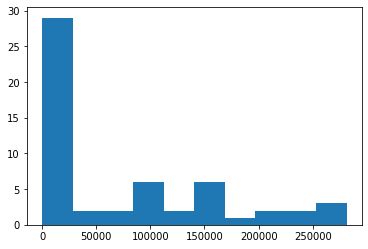

In [132]:
plt.hist(df_final['population'], bins=10)

In [133]:
df_final['venues_count'].describe()

count     55.000000
mean      29.727273
std       28.610704
min        1.000000
25%        7.000000
50%       19.000000
75%       46.000000
max      100.000000
Name: venues_count, dtype: float64

(array([18., 12.,  4.,  4.,  4.,  5.,  2.,  2.,  0.,  4.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <a list of 10 Patch objects>)

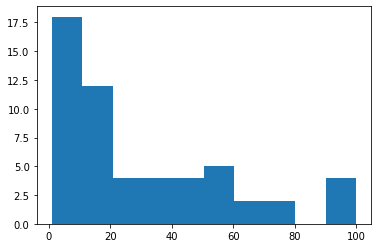

In [137]:
plt.hist(df_final['venues_count'], bins=10)

### Save the API call result with the neighborhood dataframe.

In [72]:
df_final.to_csv('sg_zones_venues.csv', index=False)

### Reload the API call result with the neighborhood dataframe (if necessary).

In [73]:
df_final = pd.read_csv('sg_zones_venues.csv')
print(df_final.shape)
df_final.tail()

(55, 8)


Neighborhood                        zone_links  Latitude  \
50                     Tuas                        /wiki/Tuas  1.316667   
51          Western Islands  /wiki/Western_Islands,_Singapore  1.248360   
52  Western Water Catchment     /wiki/Western_Water_Catchment  1.386944   
53                Woodlands        /wiki/Woodlands,_Singapore  1.436269   
54                   Yishun                      /wiki/Yishun  1.430367   

     Longitude postal districts  areas  population  venues_count  
50  103.650000               22  30.04          70             7  
51  103.672019              NaN  39.47          10             1  
52  103.691944               24  69.46         720             1  
53  103.786706               25  13.59      252530            54  
54  103.835364       26, 27, 28  21.24      214940            47

### Analyze each neighborhood

In [74]:
print(singapore_venues.shape)
singapore_venues.head()

(1635, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Ang Mo Kio               1.370167              103.845619   
1   Ang Mo Kio               1.370167              103.845619   
2   Ang Mo Kio               1.370167              103.845619   
3   Ang Mo Kio               1.370167              103.845619   
4   Ang Mo Kio               1.370167              103.845619   

                            Venue  Venue Latitude  Venue Longitude  \
0                  NTUC FairPrice        1.371507       103.847082   
1  Face Ban Mian 非板面 (Ang Mo Kio)        1.372031       103.847504   
2                          Subway        1.369136       103.847612   
3                      MOS Burger        1.369170       103.847831   
4       Kam Jia Zhuang Restaurant        1.368167       103.844118   

     Venue Category  
0       Supermarket  
1      Noodle House  
2    Sandwich Place  
3      Burger Joint  
4  Asian Restaurant

In [75]:
singapore_venues.tail()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
1630       Yishun               1.430367              103.835364   
1631       Yishun               1.430367              103.835364   
1632       Yishun               1.430367              103.835364   
1633       Yishun               1.430367              103.835364   
1634       Yishun               1.430367              103.835364   

                        Venue  Venue Latitude  Venue Longitude  \
1630     SBS Transit: Bus 811        1.430109       103.837717   
1631         156 Eating House        1.432045       103.833277   
1632  Sheng Siong Supermarket        1.426878       103.837051   
1633         AXA@Esso Station        1.431625       103.839370   
1634    Nee Soon Central Park        1.428688       103.839398   

              Venue Category  
1630                Bus Line  
1631             Coffee Shop  
1632           Grocery Store  
1633  Furniture / Home Store  
1634                    Park

In [76]:
print(singapore_venues['Venue Category'].value_counts())

Coffee Shop                      84
Chinese Restaurant               72
Café                             70
Food Court                       63
Japanese Restaurant              61
                                 ..
Doctor's Office                   1
Paper / Office Supplies Store     1
Night Market                      1
German Restaurant                 1
Buddhist Temple                   1
Name: Venue Category, Length: 248, dtype: int64


### Try to check for one particular business.

In [77]:
singapore_venues[singapore_venues['Venue Category']=='Ramen Restaurant']

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
19         Ang Mo Kio               1.370167              103.845619   
669            Museum               1.296611              103.848500   
764            Novena               1.320858              103.842431   
786            Novena               1.320858              103.842431   
843           Orchard               1.305272              103.832876   
1295  Singapore River               1.289178              103.845154   
1601           Yishun               1.430367              103.835364   

                                                  Venue  Venue Latitude  \
19                                         Takagi Ramen        1.369263   
669                                     Hakata Ikkousha        1.295331   
764                                            Sō Ramen        1.319749   
786                                             Kajiken        1.321163   
843                                 Sanpoutei Ramen 三宝亭        1.305224   
1295  Hokkaido Ramen Santouka らーめん山頭火 (Hokkaido Rame...        1.289090   
1601                                 Kanshoku Ramen Bar        1.429509   

      Venue Longitude    Venue Category  
19         103.847046  Ramen Restaurant  
669        103.852590  Ramen Restaurant  
764        103.843188  Ramen Restaurant  
786        103.843965  Ramen Restaurant  
843        103.831734  Ramen Restaurant  
1295       103.845997  Ramen Restaurant  
1601       103.835839  Ramen Restaurant

# Segmenting and Clustering of Business Venues with Machine Learning

## Use one hot encoding to encode the categorical features.

In [78]:
# one hot encoding
singapore_onehot = pd.get_dummies(singapore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_neigbor = singapore_venues['Neighborhood']

singapore_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)

singapore_onehot.insert(0, 'Neighborhood', df_neigbor)
singapore_onehot.head()

Neighborhood  Airport  Airport Service  Airport Terminal  \
0   Ang Mo Kio        0                0                 0   
1   Ang Mo Kio        0                0                 0   
2   Ang Mo Kio        0                0                 0   
3   Ang Mo Kio        0                0                 0   
4   Ang Mo Kio        0                0                 0   

   American Restaurant  Arcade  Art Gallery  Arts & Crafts Store  \
0                    0       0            0                    0   
1                    0       0            0                    0   
2                    0       0            0                    0   
3                    0       0            0                    0   
4                    0       0            0                    0   

   Arts & Entertainment  Asian Restaurant  ...  Vegetarian / Vegan Restaurant  \
0                     0                 0  ...                              0   
1                     0                 0  ...                              0   
2                     0                 0  ...                              0   
3                     0                 0  ...                              0   
4                     0                 1  ...                              0   

   Video Game Store  Video Store  Vietnamese Restaurant  Waterfront  \
0                 0            0                      0           0   
1                 0            0                      0           0   
2                 0            0                      0           0   
3                 0            0                      0           0   
4                 0            0                      0           0   

   Whisky Bar  Wine Bar  Wine Shop  Wings Joint  Yoga Studio  
0           0         0          0            0            0  
1           0         0          0            0            0  
2           0         0          0            0            0  
3           0         0          0            0            0  
4           0         0          0            0            0  

[5 rows x 248 columns]

In [79]:
singapore_grouped = singapore_onehot.groupby('Neighborhood').mean().reset_index()
print(singapore_grouped.shape)
singapore_grouped.head()

(55, 248)


Neighborhood  Airport  Airport Service  Airport Terminal  \
0   Ang Mo Kio      0.0              0.0               0.0   
1        Bedok      0.0              0.0               0.0   
2       Bishan      0.0              0.0               0.0   
3     Boon Lay      0.0              0.0               0.0   
4  Bukit Batok      0.0              0.0               0.0   

   American Restaurant  Arcade  Art Gallery  Arts & Crafts Store  \
0             0.000000     0.0          0.0                  0.0   
1             0.033333     0.0          0.0                  0.0   
2             0.000000     0.0          0.0                  0.0   
3             0.000000     0.0          0.0                  0.0   
4             0.033333     0.0          0.0                  0.0   

   Arts & Entertainment  Asian Restaurant  ...  Vegetarian / Vegan Restaurant  \
0                   0.0          0.016667  ...                       0.016667   
1                   0.0          0.016667  ...                       0.016667   
2                   0.0          0.022222  ...                       0.000000   
3                   0.0          0.000000  ...                       0.000000   
4                   0.0          0.000000  ...                       0.000000   

   Video Game Store  Video Store  Vietnamese Restaurant  Waterfront  \
0               0.0     0.000000                    0.0         0.0   
1               0.0     0.000000                    0.0         0.0   
2               0.0     0.000000                    0.0         0.0   
3               0.0     0.000000                    0.0         0.0   
4               0.0     0.033333                    0.0         0.0   

   Whisky Bar  Wine Bar  Wine Shop  Wings Joint  Yoga Studio  
0         0.0       0.0        0.0     0.000000          0.0  
1         0.0       0.0        0.0     0.016667          0.0  
2         0.0       0.0        0.0     0.000000          0.0  
3         0.0       0.0        0.0     0.000000          0.0  
4         0.0       0.0        0.0     0.000000          0.0  

[5 rows x 248 columns]

## Check the top venues for each neighborhood.

In [80]:
num_top_venues = 5

for hood in singapore_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = singapore_grouped[singapore_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ang Mo Kio----
                  venue  freq
0            Food Court  0.10
1  Fast Food Restaurant  0.07
2           Coffee Shop  0.07
3    Seafood Restaurant  0.05
4          Dessert Shop  0.05


----Bedok----
                venue  freq
0  Chinese Restaurant  0.07
1         Coffee Shop  0.07
2    Sushi Restaurant  0.05
3         Supermarket  0.05
4          Food Court  0.05


----Bishan----
             venue  freq
0       Food Court  0.11
1      Coffee Shop  0.09
2  Bubble Tea Shop  0.07
3             Café  0.07
4   Ice Cream Shop  0.04


----Boon Lay----
                                      venue  freq
0                                      Café  0.11
1                                Food Court  0.11
2                               Gaming Cafe  0.11
3                             Shopping Mall  0.11
4  Residential Building (Apartment / Condo)  0.11


----Bukit Batok----
                venue  freq
0  Italian Restaurant  0.10
1                Café  0.07
2       Shopping Mall  0.

            venue  freq
0  Breakfast Spot  0.25
1     Bus Station  0.25
2          Office  0.25
3      Food Court  0.25
4         Airport  0.00


----Tampines----
                     venue  freq
0     Fast Food Restaurant  0.14
1  South Indian Restaurant  0.14
2        Indian Restaurant  0.14
3            Grocery Store  0.14
4      Housing Development  0.14


----Tanglin----
                 venue  freq
0           Food Court  0.20
1          Bus Station  0.15
2   Chinese Restaurant  0.15
3  Japanese Restaurant  0.05
4                Hotel  0.05


----Tengah----
              venue  freq
0  Department Store  0.33
1     Moving Target  0.33
2       Bus Station  0.33
3       Pastry Shop  0.00
4      Night Market  0.00


----Toa Payoh----
                  venue  freq
0    Chinese Restaurant  0.14
1           Bus Station  0.07
2          Noodle House  0.07
3  Fast Food Restaurant  0.07
4      Asian Restaurant  0.07


----Tuas----
             venue  freq
0  Harbor / Marina  0.14
1    Boat

In [81]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [82]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = singapore_grouped['Neighborhood']

for ind in np.arange(singapore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(singapore_grouped.iloc[ind, :], num_top_venues)

print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head()

(55, 11)


Neighborhood 1st Most Common Venue  \
0   Ang Mo Kio            Food Court   
1        Bedok           Coffee Shop   
2       Bishan            Food Court   
3     Boon Lay         Grocery Store   
4  Bukit Batok    Italian Restaurant   

                      2nd Most Common Venue 3rd Most Common Venue  \
0                               Coffee Shop  Fast Food Restaurant   
1                        Chinese Restaurant      Sushi Restaurant   
2                               Coffee Shop                  Café   
3  Residential Building (Apartment / Condo)                  Café   
4                               Coffee Shop                  Café   

  4th Most Common Venue  5th Most Common Venue 6th Most Common Venue  \
0          Dessert Shop     Seafood Restaurant   Japanese Restaurant   
1            Food Court            Supermarket   Fried Chicken Joint   
2       Bubble Tea Shop     Chinese Restaurant        Cosmetics Shop   
3         Shopping Mall  Performing Arts Venue           Bus Station   
4           Supermarket          Shopping Mall     Indian Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0          Noodle House        Sandwich Place       Bubble Tea Shop   
1   Japanese Restaurant                Bakery                  Café   
2        Ice Cream Shop           Supermarket   Japanese Restaurant   
3     Martial Arts Dojo           Gaming Cafe            Food Court   
4        Ice Cream Shop           Beer Garden  Cantonese Restaurant   

  10th Most Common Venue  
0         Breakfast Spot  
1       Malay Restaurant  
2              Pet Store  
3                   Food  
4                 Bistro

In [83]:
neighborhoods_venues_sorted.tail()

Neighborhood    1st Most Common Venue   2nd Most Common Venue  \
50                     Tuas         Asian Restaurant      Seafood Restaurant   
51          Western Islands            Boat or Ferry             Yoga Studio   
52  Western Water Catchment  Fruit & Vegetable Store  Furniture / Home Store   
53                Woodlands      Japanese Restaurant                    Café   
54                   Yishun       Chinese Restaurant       Hainan Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
50            Food Court       Harbor / Marina         Boat or Ferry   
51  Fast Food Restaurant    Frozen Yogurt Shop   Fried Chicken Joint   
52    Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   
53           Coffee Shop           Bus Station    Frozen Yogurt Shop   
54          Dessert Shop            Food Court           Coffee Shop   

   6th Most Common Venue 7th Most Common Venue   8th Most Common Venue  \
50                  Food           Coffee Shop             Flower Shop   
51     French Restaurant            Food Stand              Food Court   
52            Food Stand            Food Court       Food & Drink Shop   
53     Electronics Store        Clothing Store        Asian Restaurant   
54    Italian Restaurant           Supermarket  Furniture / Home Store   

   9th Most Common Venue 10th Most Common Venue  
50   Filipino Restaurant      Fish & Chips Shop  
51     Food & Drink Shop                   Food  
52                  Food            Flower Shop  
53     Indian Restaurant     Chinese Restaurant  
54   Fried Chicken Joint                   Park

In [84]:
# example of columns in the dataframe
singapore_grouped.head()

Neighborhood  Airport  Airport Service  Airport Terminal  \
0   Ang Mo Kio      0.0              0.0               0.0   
1        Bedok      0.0              0.0               0.0   
2       Bishan      0.0              0.0               0.0   
3     Boon Lay      0.0              0.0               0.0   
4  Bukit Batok      0.0              0.0               0.0   

   American Restaurant  Arcade  Art Gallery  Arts & Crafts Store  \
0             0.000000     0.0          0.0                  0.0   
1             0.033333     0.0          0.0                  0.0   
2             0.000000     0.0          0.0                  0.0   
3             0.000000     0.0          0.0                  0.0   
4             0.033333     0.0          0.0                  0.0   

   Arts & Entertainment  Asian Restaurant  ...  Vegetarian / Vegan Restaurant  \
0                   0.0          0.016667  ...                       0.016667   
1                   0.0          0.016667  ...                       0.016667   
2                   0.0          0.022222  ...                       0.000000   
3                   0.0          0.000000  ...                       0.000000   
4                   0.0          0.000000  ...                       0.000000   

   Video Game Store  Video Store  Vietnamese Restaurant  Waterfront  \
0               0.0     0.000000                    0.0         0.0   
1               0.0     0.000000                    0.0         0.0   
2               0.0     0.000000                    0.0         0.0   
3               0.0     0.000000                    0.0         0.0   
4               0.0     0.033333                    0.0         0.0   

   Whisky Bar  Wine Bar  Wine Shop  Wings Joint  Yoga Studio  
0         0.0       0.0        0.0     0.000000          0.0  
1         0.0       0.0        0.0     0.016667          0.0  
2         0.0       0.0        0.0     0.000000          0.0  
3         0.0       0.0        0.0     0.000000          0.0  
4         0.0       0.0        0.0     0.000000          0.0  

[5 rows x 248 columns]

### Add more info for each neighborhood. 

In [85]:
singapore_grouped['population'] = df_final['population']

In [86]:
singapore_grouped['venues_count'] = df_final['venues_count']

In [87]:
def busy_neighborhood(venues_count):
    if venues_count < 15:
        return 0
    elif venues_count <50:
        return 0.5
    else:
        return 1

In [88]:
# check residential population in the neighborthood
def populated_neighborhood(population):
    if population < 100:
        return 0
    elif population <1000:
        return 0.25
    elif population <5000:
        return 0.50
    elif population <10000:
        return 0.75
    else:
        return 1

In [89]:
singapore_grouped['busy_neighborhood'] = singapore_grouped['venues_count'].apply(busy_neighborhood)

In [90]:
singapore_grouped['populated_neighborhood'] = singapore_grouped['population'].apply(populated_neighborhood)

In [91]:
singapore_grouped['venues per population'] = singapore_grouped['venues_count']/(1+singapore_grouped['population'])

In [92]:
singapore_grouped[['Neighborhood','population', 'venues_count', 'busy_neighborhood', 'populated_neighborhood']].head()

Neighborhood  population  venues_count  busy_neighborhood  \
0   Ang Mo Kio      165710            60                1.0   
1        Bedok      281300            60                1.0   
2       Bishan       88490            45                0.5   
3     Boon Lay          30             9                0.0   
4  Bukit Batok      144410            30                0.5   

   populated_neighborhood  
0                     1.0  
1                     1.0  
2                     1.0  
3                     0.0  
4                     1.0

In [93]:
singapore_grouped[['Neighborhood','population', 'venues_count', 'busy_neighborhood', 'populated_neighborhood']].tail()

Neighborhood  population  venues_count  busy_neighborhood  \
50                     Tuas          70             7                0.0   
51          Western Islands          10             1                0.0   
52  Western Water Catchment         720             1                0.0   
53                Woodlands      252530            54                1.0   
54                   Yishun      214940            47                0.5   

    populated_neighborhood  
50                    0.00  
51                    0.00  
52                    0.25  
53                    1.00  
54                    1.00

### Considering special neighborhood (airport, industrial, nature)

In [94]:
singapore_grouped['airport'] = singapore_grouped['Neighborhood']
singapore_grouped['industrial'] = singapore_grouped['Neighborhood']
singapore_grouped['nature'] = singapore_grouped['Neighborhood']

In [95]:
airport_neighborhood_list = ['Changi', 'Changi Bay', 'Paya Lebar', 'Seletar']
industrial_neighborhood_list = ['Marina East', 'Marina South', 'Jurong Island', 'Tuas', 'Western Islands']
nature_neighborhood_list = ['Southern Islands', 
                            'Western Water Catchment',
                            'North-Eastern Islands', 
                            'Central Water Catchment', 
                            'Mandai', 
                            'Simpang']

In [96]:
def airport_neighborhood_encoder(neigh):
    if neigh in airport_neighborhood_list:
        return 1
    else:
        return 0
    
def industrial_neighborhood_encoder(neigh):
    if neigh in industrial_neighborhood_list:
        return 1
    else:
        return 0

def nature_neighborhood_encoder(neigh):
    if neigh in nature_neighborhood_list:
        return 1
    else:
        return 0

In [97]:
singapore_grouped['airport'] = singapore_grouped['airport'].apply(airport_neighborhood_encoder)
singapore_grouped['industrial'] = singapore_grouped['industrial'].apply(industrial_neighborhood_encoder)
singapore_grouped['nature'] = singapore_grouped['nature'].apply(industrial_neighborhood_encoder)

## Use machine learning to cluster the neighborhood

In [98]:
columns_to_consider = ['Neighborhood', 'population', 'venues_count', 
                       'busy_neighborhood', 'populated_neighborhood',
                       'venues per population','airport', 'industrial', 
                       'nature']

In [99]:
singapore_grouped_selected = singapore_grouped[columns_to_consider]

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
from sklearn.cluster import KMeans

In [102]:
# set number of clusters
kclusters = 7

singapore_grouped_clustering = singapore_grouped_selected.drop('Neighborhood', 1)

# scale with MinMaxScaler()
scaler = MinMaxScaler()

singapore_grouped_clustering_mm = scaler.fit_transform(singapore_grouped_clustering)

singapore_grouped_clustering_mm

array([[5.89086385e-01, 5.95959596e-01, 1.00000000e+00, 1.00000000e+00,
        3.47751869e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.95959596e-01, 1.00000000e+00, 1.00000000e+00,
        1.94368852e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.14575187e-01, 4.44444444e-01, 5.00000000e-01, 1.00000000e+00,
        4.98731439e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.06647707e-04, 8.08080808e-02, 0.00000000e+00, 0.00000000e+00,
        2.99276183e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.13366513e-01, 2.92929293e-01, 5.00000000e-01, 1.00000000e+00,
        1.88642821e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.39886242e-01, 1.11111111e-01, 0.00000000e+00, 1.00000000e+00,
        5.59355903e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00604337e-01, 4.44444444e-01, 5.00000000e-01, 1.00000000e+00,
        3.03915226e-06, 0.00000000e+00, 0.00000000e+00, 0.

In [103]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(singapore_grouped_clustering_mm)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 5, 6, 5, 0, 5, 0, 6, 2])

In [104]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

singapore_merged = df_final

In [105]:
print(singapore_merged.shape)
singapore_merged.head(55)

(55, 8)


Neighborhood                        zone_links  Latitude  \
0                Ang Mo Kio                  /wiki/Ang_Mo_Kio  1.370167   
1                     Bedok                       /wiki/Bedok  1.323600   
2                    Bishan           /wiki/Bishan,_Singapore  1.350833   
3                  Boon Lay      /wiki/Boon_Lay_Planning_Area  1.347735   
4               Bukit Batok                 /wiki/Bukit_Batok  1.359031   
5               Bukit Merah                 /wiki/Bukit_Merah  1.281906   
6             Bukit Panjang               /wiki/Bukit_Panjang  1.380833   
7               Bukit Timah                 /wiki/Bukit_Timah  1.329411   
8   Central Water Catchment     /wiki/Central_Water_Catchment  1.366667   
9                    Changi                      /wiki/Changi  1.345000   
10               Changi Bay                  /wiki/Changi_Bay  1.316850   
11            Choa Chu Kang               /wiki/Choa_Chu_Kang  1.383333   
12                 Clementi         /wiki/Clementi,_Singapore  1.316181   
13            Downtown Core               /wiki/Downtown_Core  1.286667   
14                  Geylang                     /wiki/Geylang  1.320556   
15                  Hougang                     /wiki/Hougang  1.371778   
16              Jurong East                 /wiki/Jurong_East  1.328883   
17              Jurong West                 /wiki/Jurong_West  1.339722   
18                  Kallang                     /wiki/Kallang  1.310833   
19             Lim Chu Kang                /wiki/Lim_Chu_Kang  1.431844   
20                   Mandai                      /wiki/Mandai  1.411667   
21              Marina East                 /wiki/Marina_East  1.291158   
22             Marina South                /wiki/Marina_South  1.269200   
23            Marine Parade               /wiki/Marine_Parade  1.303056   
24                   Museum        /wiki/Museum_Planning_Area  1.296611   
25                   Newton           /wiki/Newton,_Singapore  1.307167   
26    North-Eastern Islands       /wiki/North-Eastern_Islands  1.404381   
27                   Novena           /wiki/Novena,_Singapore  1.320858   
28                  Orchard                       mw-redirect  1.305272   
29                   Outram           /wiki/Outram,_Singapore  1.284889   
30                Pasir Ris                   /wiki/Pasir_Ris  1.372094   
31               Paya Lebar                  /wiki/Paya_Lebar  1.353899   
32                  Pioneer          /wiki/Pioneer,_Singapore  1.337588   
33                  Punggol                     /wiki/Punggol  1.398278   
34               Queenstown       /wiki/Queenstown,_Singapore  1.294167   
35             River Valley     /wiki/River_Valley,_Singapore  1.308398   
36                   Rochor                      /wiki/Rochor  1.305111   
37                  Seletar                     /wiki/Seletar  1.405333   
38                Sembawang                   /wiki/Sembawang  1.449093   
39                 Sengkang                    /wiki/Sengkang  1.391667   
40                Serangoon                   /wiki/Serangoon  1.355356   
41                  Simpang                     /wiki/Simpang  1.445295   
42          Singapore River             /wiki/Singapore_River  1.289178   
43         Southern Islands            /wiki/Southern_Islands  1.247027   
44             Straits View                /wiki/Straits_View  1.278552   
45             Sungei Kadut                /wiki/Sungei_Kadut  1.418000   
46                 Tampines                    /wiki/Tampines  1.349592   
47                  Tanglin                     /wiki/Tanglin  1.307584   
48                   Tengah           /wiki/Tengah,_Singapore  1.362476   
49                Toa Payoh                   /wiki/Toa_Payoh  1.334303   
50                     Tuas                        /wiki/Tuas  1.316667   
51          Western Islands  /wiki/Western_Islands,_Singapore  1.248360   
52  Western Water Catchment     /wiki/We

In [106]:
singapore_merged.tail()

Neighborhood                        zone_links  Latitude  \
50                     Tuas                        /wiki/Tuas  1.316667   
51          Western Islands  /wiki/Western_Islands,_Singapore  1.248360   
52  Western Water Catchment     /wiki/Western_Water_Catchment  1.386944   
53                Woodlands        /wiki/Woodlands,_Singapore  1.436269   
54                   Yishun                      /wiki/Yishun  1.430367   

     Longitude postal districts  areas  population  venues_count  
50  103.650000               22  30.04          70             7  
51  103.672019              NaN  39.47          10             1  
52  103.691944               24  69.46         720             1  
53  103.786706               25  13.59      252530            54  
54  103.835364       26, 27, 28  21.24      214940            47

In [107]:
# merge singapore_grouped with singapore_data to add latitude/longitude, population and venues count for each neighborhood
singapore_merged = singapore_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [108]:
singapore_merged['Cluster Labels'].value_counts()
#singapore_merged = singapore_merged.dropna()
singapore_merged

Neighborhood                        zone_links  Latitude  \
0                Ang Mo Kio                  /wiki/Ang_Mo_Kio  1.370167   
1                     Bedok                       /wiki/Bedok  1.323600   
2                    Bishan           /wiki/Bishan,_Singapore  1.350833   
3                  Boon Lay      /wiki/Boon_Lay_Planning_Area  1.347735   
4               Bukit Batok                 /wiki/Bukit_Batok  1.359031   
5               Bukit Merah                 /wiki/Bukit_Merah  1.281906   
6             Bukit Panjang               /wiki/Bukit_Panjang  1.380833   
7               Bukit Timah                 /wiki/Bukit_Timah  1.329411   
8   Central Water Catchment     /wiki/Central_Water_Catchment  1.366667   
9                    Changi                      /wiki/Changi  1.345000   
10               Changi Bay                  /wiki/Changi_Bay  1.316850   
11            Choa Chu Kang               /wiki/Choa_Chu_Kang  1.383333   
12                 Clementi         /wiki/Clementi,_Singapore  1.316181   
13            Downtown Core               /wiki/Downtown_Core  1.286667   
14                  Geylang                     /wiki/Geylang  1.320556   
15                  Hougang                     /wiki/Hougang  1.371778   
16              Jurong East                 /wiki/Jurong_East  1.328883   
17              Jurong West                 /wiki/Jurong_West  1.339722   
18                  Kallang                     /wiki/Kallang  1.310833   
19             Lim Chu Kang                /wiki/Lim_Chu_Kang  1.431844   
20                   Mandai                      /wiki/Mandai  1.411667   
21              Marina East                 /wiki/Marina_East  1.291158   
22             Marina South                /wiki/Marina_South  1.269200   
23            Marine Parade               /wiki/Marine_Parade  1.303056   
24                   Museum        /wiki/Museum_Planning_Area  1.296611   
25                   Newton           /wiki/Newton,_Singapore  1.307167   
26    North-Eastern Islands       /wiki/North-Eastern_Islands  1.404381   
27                   Novena           /wiki/Novena,_Singapore  1.320858   
28                  Orchard                       mw-redirect  1.305272   
29                   Outram           /wiki/Outram,_Singapore  1.284889   
30                Pasir Ris                   /wiki/Pasir_Ris  1.372094   
31               Paya Lebar                  /wiki/Paya_Lebar  1.353899   
32                  Pioneer          /wiki/Pioneer,_Singapore  1.337588   
33                  Punggol                     /wiki/Punggol  1.398278   
34               Queenstown       /wiki/Queenstown,_Singapore  1.294167   
35             River Valley     /wiki/River_Valley,_Singapore  1.308398   
36                   Rochor                      /wiki/Rochor  1.305111   
37                  Seletar                     /wiki/Seletar  1.405333   
38                Sembawang                   /wiki/Sembawang  1.449093   
39                 Sengkang                    /wiki/Sengkang  1.391667   
40                Serangoon                   /wiki/Serangoon  1.355356   
41                  Simpang                     /wiki/Simpang  1.445295   
42          Singapore River             /wiki/Singapore_River  1.289178   
43         Southern Islands            /wiki/Southern_Islands  1.247027   
44             Straits View                /wiki/Straits_View  1.278552   
45             Sungei Kadut                /wiki/Sungei_Kadut  1.418000   
46                 Tampines                    /wiki/Tampines  1.349592   
47                  Tanglin                     /wiki/Tanglin  1.307584   
48                   Tengah           /wiki/Tengah,_Singapore  1.362476   
49                Toa Payoh                   /wiki/Toa_Payoh  1.334303   
50                     Tuas                        /wiki/Tuas  1.316667   
51          Western Islands  /wiki/Western_Islands,_Singapore  1.248360   
52  Western Water Catchment     /wiki/We

In [299]:
neighborhood_list = singapore_merged['Neighborhood']
population_list = singapore_merged['population']

neighb_population_dict = {}
for index in range(len(neighborhood_list)):
    neighborhood = neighborhood_list[index]
    neighb_population_dict[neighborhood] = population_list[index]    

In [439]:
#neighb_population_dict

In [440]:
neighborhood_list = singapore_merged['Neighborhood']
latitude_list = singapore_merged['Latitude']

neighb_latitude_dict = {}
for index in range(len(neighborhood_list)):
    neighborhood = neighborhood_list[index]
    neighb_latitude_dict[neighborhood] = latitude_list[index]  

In [442]:
#neighb_latitude_dict

In [450]:
neighborhood_list = singapore_merged['Neighborhood']
longitude_list = singapore_merged['Longitude']

neighb_longitude_dict = {}
for index in range(len(neighborhood_list)):
    neighborhood = neighborhood_list[index]
    neighb_longitude_dict[neighborhood] = longitude_list[index]  

In [452]:
#neighb_longitude_dict

In [109]:
singapore_merged['Cluster Labels'].value_counts()

5    14
6    11
4     8
3     7
0     7
2     4
1     4
Name: Cluster Labels, dtype: int64

## Map the Cluster on Folium Map.

In [110]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [111]:
# create map
map_clusters = folium.Map(location=[1.290270, 103.851959], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
number_venues = 0
for lat, lon, poi, cluster, pop, ven in zip(singapore_merged['Latitude'], 
                                       singapore_merged['Longitude'], 
                                       singapore_merged['Neighborhood'], 
                                       singapore_merged['Cluster Labels'], 
                                       singapore_merged['population'],
                                       singapore_merged['venues_count']):    
    #print(number_venues, poi)
    number_venues += 1
    cluster = int(cluster)
    label_string = ' Cluster ' + str(cluster) + ', population: ' + str(pop) + ', venues_count: ' + str(ven)
    label_string = str(poi) + ' [' + label_string + ']'
    label = folium.Popup(label_string, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        #color=rainbow[cluster-1],
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

In [140]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 0, singapore_merged.columns[[1] + list(range(5, singapore_merged.shape[1]))]]

zone_links  areas  population  venues_count  Cluster Labels  \
5     /wiki/Bukit_Merah  14.34      151870            12               0   
7     /wiki/Bukit_Timah  17.53       77280             3               0   
11  /wiki/Choa_Chu_Kang   6.11      187510            10               0   
18        /wiki/Kallang   9.17      101420            12               0   
33        /wiki/Punggol   9.34      161570             4               0   
40      /wiki/Serangoon  10.10      117310            11               0   
46       /wiki/Tampines  20.89      257110             7               0   

   1st Most Common Venue                     2nd Most Common Venue  \
5     Chinese Restaurant  Residential Building (Apartment / Condo)   
7                   Pool                               Bus Station   
11      Department Store                               Coffee Shop   
18            Restaurant                               Coffee Shop   
33                Casino                        Chinese Restaurant   
40      Asian Restaurant                         Indian Restaurant   
46     Indian Restaurant                            Sandwich Place   

   3rd Most Common Venue 4th Most Common Venue    5th Most Common Venue  \
5            Coffee Shop    Seafood Restaurant                 Bus Line   
7            Coffee Shop           Yoga Studio     Fast Food Restaurant   
11           Bus Station              Bus Stop           Shop & Service   
18           Supermarket  Fast Food Restaurant                   Hostel   
33           Bus Station           High School              Flower Shop   
40  Fast Food Restaurant             Bike Shop                     Park   
46  Fast Food Restaurant         Grocery Store  South Indian Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
5             Food Court   Japanese Restaurant     Convenience Store   
7    Fried Chicken Joint     French Restaurant            Food Stand   
11            Shoe Store         Grocery Store      Malay Restaurant   
18          Dessert Shop         Metro Station        Sandwich Place   
33                 Field   Filipino Restaurant     Fish & Chips Shop   
40           Coffee Shop                Bakery           Auto Garage   
46                 Plaza   Housing Development      Department Store   

   9th Most Common Venue 10th Most Common Venue  
5       Asian Restaurant    Filipino Restaurant  
7             Food Court      Food & Drink Shop  
11  Fast Food Restaurant      Convenience Store  
18     Food & Drink Shop                   Food  
33           Flea Market            Yoga Studio  
40                  Café  Indonesian Restaurant  
46                  Farm      French Restaurant

In [141]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 1, singapore_merged.columns[[1] + list(range(5, singapore_merged.shape[1]))]]

zone_links  areas  population  venues_count  \
21                 /wiki/Marina_East   1.82           0             4   
22                /wiki/Marina_South   1.62           0            13   
50                        /wiki/Tuas  30.04          70             7   
51  /wiki/Western_Islands,_Singapore  39.47          10             1   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
21               1           Golf Course    Golf Driving Range   
22               1                Cruise                  Pier   
50               1      Asian Restaurant    Seafood Restaurant   
51               1         Boat or Ferry           Yoga Studio   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
21                  Park           Yoga Studio  Fast Food Restaurant   
22         Boat or Ferry                  Road                Buffet   
50            Food Court       Harbor / Marina         Boat or Ferry   
51  Fast Food Restaurant    Frozen Yogurt Shop   Fried Chicken Joint   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
21   Fried Chicken Joint     French Restaurant            Food Stand   
22            Food Stand            Food Court     French Restaurant   
50                  Food           Coffee Shop           Flower Shop   
51     French Restaurant            Food Stand            Food Court   

   9th Most Common Venue 10th Most Common Venue  
21            Food Court      Food & Drink Shop  
22  Fast Food Restaurant      Food & Drink Shop  
50   Filipino Restaurant      Fish & Chips Shop  
51     Food & Drink Shop                   Food

In [142]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 2, singapore_merged.columns[[1] + list(range(5, singapore_merged.shape[1]))]]

zone_links  areas  population  venues_count  Cluster Labels  \
9       /wiki/Changi  40.61        2080            13               2   
10  /wiki/Changi_Bay   1.70           0             6               2   
31  /wiki/Paya_Lebar  11.69          40            20               2   
37     /wiki/Seletar  10.25         250             7               2   

   1st Most Common Venue       2nd Most Common Venue 3rd Most Common Venue  \
9            Bus Station            Airport Terminal               Airport   
10         Boat or Ferry                    Gym Pool            Smoke Shop   
31                Bakery                 Coffee Shop          Noodle House   
37     Other Repair Shop  Modern European Restaurant            Playground   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
9                 Tunnel   Sporting Goods Shop           Men's Store   
10           Pizza Place        History Museum           Flower Shop   
31           Bus Station        Breakfast Spot        Ice Cream Shop   
37                  Café    English Restaurant            Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
9                   Café                  Road           Coffee Shop   
10                 Field   Filipino Restaurant     Fish & Chips Shop   
31      Department Store          Dance Studio           Pizza Place   
37     Food & Drink Shop           Flea Market                 Field   

   10th Most Common Venue  
9           Movie Theater  
10            Flea Market  
31              Rest Area  
37    Filipino Restaurant

In [143]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 3, singapore_merged.columns[[1] + list(range(5, singapore_merged.shape[1]))]]

zone_links  areas  population  venues_count  \
13         /wiki/Downtown_Core   4.34        2510            71   
24  /wiki/Museum_Planning_Area   0.83         420            61   
25     /wiki/Newton,_Singapore   2.07        7640            71   
28                 mw-redirect   0.96         990           100   
29     /wiki/Outram,_Singapore   1.37       20030           100   
42       /wiki/Singapore_River   0.96        2980           100   
44          /wiki/Straits_View   0.77           0            97   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
13               3    Italian Restaurant          Cocktail Bar   
24               3                 Hotel                  Café   
25               3                 Hotel   Japanese Restaurant   
28               3              Boutique   Japanese Restaurant   
29               3    Chinese Restaurant                Hostel   
42               3   Japanese Restaurant                 Hotel   
44               3                  Café           Coffee Shop   

            3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
13                   Concert Hall   Japanese Restaurant      Asian Restaurant   
24            Japanese Restaurant           Karaoke Bar         Movie Theater   
25             Chinese Restaurant                  Café      Asian Restaurant   
28               Sushi Restaurant                 Hotel    Chinese Restaurant   
29  Vegetarian / Vegan Restaurant            Food Court    Seafood Restaurant   
42                      Nightclub            Food Court    Seafood Restaurant   
44              Korean Restaurant          Cocktail Bar            Restaurant   

   6th Most Common Venue          7th Most Common Venue 8th Most Common Venue  \
13    Chinese Restaurant                    Coffee Shop           Salad Place   
24        Ice Cream Shop                       Beer Bar           Yoga Studio   
25              Boutique          Indonesian Restaurant           Coffee Shop   
28                  Café                 Cosmetics Shop         Shopping Mall   
29                  Café                          Hotel          Noodle House   
42          Noodle House  Vegetarian / Vegan Restaurant                Bakery   
44                 Hotel             Italian Restaurant    Chinese Restaurant   

   9th Most Common Venue      10th Most Common Venue  
13                  Café                 Yoga Studio  
24             Multiplex                  Hobby Shop  
25       Thai Restaurant         Sporting Goods Shop  
28      Asian Restaurant       Indonesian Restaurant  
29          Cocktail Bar                         Spa  
42           Supermarket                         Bar  
44            Food Court  Modern European Restaurant

In [146]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 4, singapore_merged.columns[[1] + list(range(5, singapore_merged.shape[1]))]]

zone_links  areas  population  venues_count  \
0             /wiki/Ang_Mo_Kio  13.94      165710            60   
1                  /wiki/Bedok  21.69      281300            60   
12   /wiki/Clementi,_Singapore   9.49       93000            63   
15               /wiki/Hougang  13.93      223010            32   
17           /wiki/Jurong_West  14.69      266720            58   
39              /wiki/Sengkang  10.59      240640            30   
53  /wiki/Woodlands,_Singapore  13.59      252530            54   
54                /wiki/Yishun  21.24      214940            47   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0                4            Food Court           Coffee Shop   
1                4           Coffee Shop    Chinese Restaurant   
12               4           Coffee Shop            Food Court   
15               4  Fast Food Restaurant                  Café   
17               4      Asian Restaurant  Fast Food Restaurant   
39               4            Food Court  Fast Food Restaurant   
53               4   Japanese Restaurant                  Café   
54               4    Chinese Restaurant     Hainan Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0   Fast Food Restaurant          Dessert Shop    Seafood Restaurant   
1       Sushi Restaurant            Food Court           Supermarket   
12      Asian Restaurant          Dessert Shop    Chinese Restaurant   
15            Food Court           Coffee Shop           Supermarket   
17   Japanese Restaurant    Chinese Restaurant          Dessert Shop   
39           Bus Station    Chinese Restaurant      Asian Restaurant   
53           Coffee Shop           Bus Station    Frozen Yogurt Shop   
54          Dessert Shop            Food Court           Coffee Shop   

   6th Most Common Venue 7th Most Common Venue   8th Most Common Venue  \
0    Japanese Restaurant          Noodle House          Sandwich Place   
1    Fried Chicken Joint   Japanese Restaurant                  Bakery   
12          Noodle House       Thai Restaurant       Indian Restaurant   
15          Dessert Shop    Chinese Restaurant              Soup Place   
17           Coffee Shop                  Café      Seafood Restaurant   
39           Coffee Shop            Restaurant             Supermarket   
53     Electronics Store        Clothing Store        Asian Restaurant   
54    Italian Restaurant           Supermarket  Furniture / Home Store   

   9th Most Common Venue 10th Most Common Venue  
0        Bubble Tea Shop         Breakfast Spot  
1                   Café       Malay Restaurant  
12     Electronics Store    Japanese Restaurant  
15             Bookstore       Sushi Restaurant  
17                   Spa         Breakfast Spot  
39      Sushi Restaurant       Basketball Court  
53     Indian Restaurant     Chinese Restaurant  
54   Fried Chicken Joint                   Park

In [147]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 5, singapore_merged.columns[[1] + list(range(5, singapore_merged.shape[1]))]]

zone_links  areas  population  venues_count  \
2         /wiki/Bishan,_Singapore   7.62       88490            45   
4               /wiki/Bukit_Batok  11.13      144410            30   
6             /wiki/Bukit_Panjang   8.99      140820            45   
14                  /wiki/Geylang   9.64      111610            17   
16              /wiki/Jurong_East  17.83       81180            19   
23            /wiki/Marine_Parade   6.12       47250            36   
27        /wiki/Novena,_Singapore   8.98       48950            58   
30                /wiki/Pasir_Ris  15.02      146920            31   
34    /wiki/Queenstown,_Singapore  20.43       97870            31   
35  /wiki/River_Valley,_Singapore   1.48        9930            24   
36                   /wiki/Rochor   1.62       13450            41   
38                /wiki/Sembawang  12.34       87380            15   
47                  /wiki/Tanglin   7.63       20960            20   
49                /wiki/Toa_Payoh   8.17      120480            29   

    Cluster Labels 1st Most Common Venue          2nd Most Common Venue  \
2                5            Food Court                    Coffee Shop   
4                5    Italian Restaurant                    Coffee Shop   
6                5      Sushi Restaurant                    Coffee Shop   
14               5            Food Court               Asian Restaurant   
16               5           Bus Station                          Hotel   
23               5                 Hotel                 Massage Studio   
27               5                  Café                    Coffee Shop   
30               5           Coffee Shop               Sushi Restaurant   
34               5           Coffee Shop                     Food Court   
35               5          Noodle House             Chinese Restaurant   
36               5     Indian Restaurant  Vegetarian / Vegan Restaurant   
38               5  Fast Food Restaurant                    Coffee Shop   
47               5            Food Court             Chinese Restaurant   
49               5    Chinese Restaurant                    Coffee Shop   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
2                   Café       Bubble Tea Shop    Chinese Restaurant   
4                   Café           Supermarket         Shopping Mall   
6   Fast Food Restaurant          Noodle House         Shopping Mall   
14         Grocery Store    Chinese Restaurant                  Pool   
16                  Café            Steakhouse      Sushi Restaurant   
23             Multiplex    Chinese Restaurant           Salad Place   
27   Japanese Restaurant    Chinese Restaurant                 Hotel   
30           Bus Station        Sandwich Place  Fast Food Restaurant   
34           Bus Station          Noodle House              Beer Bar   
35      Asian Restaurant            Food Court    Seafood Restaurant   
36    Chinese Restaurant                 Hotel                Hostel   
38    Chinese Restaurant   Government Building           Supermarket   
47           Bus Station                   Gym   Japanese Restaurant   
49  Fast Food Restaurant          Noodle House      Asian Restaurant   

   6th Most Common Venue          7th Most Common Venue 8th Most Common Venue  \
2         Cosmetics Shop                 Ice Cream Shop           Supermarket   
4      Indian Restaurant                 Ice Cream Shop           Beer Garden   
6    Japanese Restaurant               Asian Restaurant     Convenience Store   
14    Dim Sum Restaurant  Vegetarian / Vegan Restaurant                Bistro   
16    Chinese Restaurant           Fast Food Restaurant      Basketball Court   
23           Coffee Shop            Japanese Restaurant                Lounge   
27    Italian Restaurant              Hainan Restaurant        Sandwich Place   
30           Supermarket                         Bakery         Shopping Mall   
34                  Café            

In [148]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 6, singapore_merged.columns[[1] + list(range(5, singapore_merged.shape[1]))]]

zone_links  areas  population  venues_count  \
3    /wiki/Boon_Lay_Planning_Area   8.23          30             9   
8   /wiki/Central_Water_Catchment  37.15           0             1   
19             /wiki/Lim_Chu_Kang  17.30         110             4   
20                   /wiki/Mandai  11.77        2090             3   
26    /wiki/North-Eastern_Islands  42.88          50             3   
32       /wiki/Pioneer,_Singapore  12.10          90            18   
41                  /wiki/Simpang   5.13           0             1   
43         /wiki/Southern_Islands   6.07        1800            13   
45             /wiki/Sungei_Kadut  15.99         780             4   
48        /wiki/Tengah,_Singapore   7.40          10             3   
52  /wiki/Western_Water_Catchment  69.46         720             1   

    Cluster Labels    1st Most Common Venue  \
3                6            Grocery Store   
8                6         Business Service   
19               6                     Farm   
20               6           Scenic Lookout   
26               6           Scenic Lookout   
32               6                      Gym   
41               6                 Platform   
43               6              Golf Course   
45               6           Breakfast Spot   
48               6            Moving Target   
52               6  Fruit & Vegetable Store   

                       2nd Most Common Venue 3rd Most Common Venue  \
3   Residential Building (Apartment / Condo)                  Café   
8                                Yoga Studio  Fast Food Restaurant   
19              Theme Park Ride / Attraction        Cosmetics Shop   
20                                    Garden                 Trail   
26                                 Rest Area         Moving Target   
32                         Convenience Store           Bus Station   
41                               Yoga Studio                  Farm   
43                                     Hotel                   Spa   
45                                Food Court           Bus Station   
48                          Department Store           Bus Station   
52                    Furniture / Home Store    Frozen Yogurt Shop   

   4th Most Common Venue    5th Most Common Venue   6th Most Common Venue  \
3          Shopping Mall    Performing Arts Venue             Bus Station   
8     Frozen Yogurt Shop      Fried Chicken Joint       French Restaurant   
19           Yoga Studio              Flower Shop                   Field   
20           Event Space        French Restaurant              Food Stand   
26      Department Store             Dessert Shop     Fried Chicken Joint   
32          Dance Studio      Dumpling Restaurant    Fast Food Restaurant   
41    Frozen Yogurt Shop      Fried Chicken Joint       French Restaurant   
43    Light Rail Station             Cocktail Bar                    Café   
45                Office              Yoga Studio  Furniture / Home Store   
48                 Field  Fruit & Vegetable Store      Frozen Yogurt Shop   
52   Fried Chicken Joint        French Restaurant              Food Stand   

      7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
3         Martial Arts Dojo           Gaming Cafe            Food Court   
8                Food Stand            Food Court     Food & Drink Shop   
19      Filipino Restaurant     Fish & Chips Shop           Flea Market   
20               Food Court     Food & Drink Shop                  Food   
26        French Restaurant            Food Stand            Food Court   
32              Supermarket                  Café  Gym / Fitness Center   
41               Food Stand            Food Court     Food & Drink Shop   
43  New American Restaurant                 Beach                  Pool   
45       Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   
48      Fried Chicken Joint     French Restaurant            Food Stand   
52               Food Cour

# Case Study for Culinary Venues

In [153]:
singapore_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Ang Mo Kio               1.370167              103.845619   
1   Ang Mo Kio               1.370167              103.845619   
2   Ang Mo Kio               1.370167              103.845619   
3   Ang Mo Kio               1.370167              103.845619   
4   Ang Mo Kio               1.370167              103.845619   

                            Venue  Venue Latitude  Venue Longitude  \
0                  NTUC FairPrice        1.371507       103.847082   
1  Face Ban Mian 非板面 (Ang Mo Kio)        1.372031       103.847504   
2                          Subway        1.369136       103.847612   
3                      MOS Burger        1.369170       103.847831   
4       Kam Jia Zhuang Restaurant        1.368167       103.844118   

     Venue Category  
0       Supermarket  
1      Noodle House  
2    Sandwich Place  
3      Burger Joint  
4  Asian Restaurant

In [321]:
singapore_venues.tail()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
1630       Yishun               1.430367              103.835364   
1631       Yishun               1.430367              103.835364   
1632       Yishun               1.430367              103.835364   
1633       Yishun               1.430367              103.835364   
1634       Yishun               1.430367              103.835364   

                        Venue  Venue Latitude  Venue Longitude  \
1630     SBS Transit: Bus 811        1.430109       103.837717   
1631         156 Eating House        1.432045       103.833277   
1632  Sheng Siong Supermarket        1.426878       103.837051   
1633         AXA@Esso Station        1.431625       103.839370   
1634    Nee Soon Central Park        1.428688       103.839398   

              Venue Category  
1630                Bus Line  
1631             Coffee Shop  
1632           Grocery Store  
1633  Furniture / Home Store  
1634                    Park

## Culinary Venues

In [154]:
general_food_categories = ['Food Court', 'Breakfast Spot', 'Bistro', 'Deli / Bodega', 'Food Stand', 
                           'Bed & Breakfast', 'Cafeteria', 'Food & Drink Shop', 'Street Food Gathering', 
                           'Comfort Food Restaurant']

In [155]:
fastfood_categories = ['Burger Joint', 'Sandwich Place', 'Fast Food Restaurant', 
                       'Fried Chicken Joint',  'Steakhouse', 'Burrito Place', 'Wings Joint', 
                       'BBQ Joint', 'Fish & Chips Shop', 'Diner', 'Buffet', 'Pizza Place']

In [156]:
dessert_beverages_cafe_categories = ['Dessert Shop', 'Snack Place', 'Coffee Shop', 'Bubble Tea Shop', 
                                     'Frozen Yogurt Shop',  'Café', 'Ice Cream Shop', 'Cha Chaan Teng', 
                                     'Juice Bar', 'Tea Room', 'Chocolate Shop']

In [157]:
pub_bar_categories = ['Gastropub', 'Beer Garden', 'Beer Bar', 'Bar', 'Cocktail Bar', 'Club House', 
                      'Nightclub',  'Hotel Bar', 'Whisky Bar', 'Pub', 'Wine Bar', 'Brewery', 'Wine Shop', 
                      'Sake Bar', 'Sports Bar', 'Rock Club'  ]

In [158]:
bakery_categories = ['Bakery', 'Bagel Shop', 'Donut Shop', 'Pastry Shop', 'Creperie', 'Cupcake Shop']

In [269]:
east_asian_food_categories = ['Asian Restaurant', 'Chinese Restaurant', 'Japanese Restaurant', 
                              'Hong Kong Restaurant', 'Shaanxi Restaurant', 'Cantonese Restaurant', 
                              'Chinese Breakfast Place', 'Korean Restaurant', 'Japanese Curry Restaurant', 
                              'Taiwanese Restaurant', 'Hainan Restaurant', 'Dongbei Restaurant', 'Szechuan Restaurant', 
                              'Peking Duck Restaurant', 'Seafood Restaurant', 'Sushi Restaurant', 'Hotpot Restaurant', 
                              'Noodle House', 'Ramen Restaurant', 'Udon Restaurant', 'Dumpling Restaurant', 
                              'Dim Sum Restaurant', 'Soup Place']

In [160]:
southeast_asian_food_categories = ['Thai Restaurant', 'Malay Restaurant', 'Indonesian Restaurant', 
                                   'Filipino Restaurant', 'Vietnamese Restaurant', 'Halal Restaurant']

In [161]:
indian_food_categories = ['Indian Restaurant', 'Middle Eastern Restaurant', 'Kebab Restaurant', 
                          'North Indian Restaurant', 'South Indian Restaurant', 'Halal Restaurant', 
                          'Vegetarian / Vegan Restaurant']

In [162]:
western_food_categories = ['Modern European Restaurant', 'American Restaurant', 'French Restaurant', 
                           'Italian Restaurant', 'Mexican Restaurant', 'Spanish Restaurant', 'German Restaurant', 
                           'Mediterranean Restaurant', 'Greek Restaurant', 'English Restaurant', 'Cuban Restaurant', 
                           'New American Restaurant', 'Southern / Soul Food Restaurant', 'Australian Restaurant']

In [163]:
seafood_categories = ['Seafood Restaurant', 'Sushi Restaurant', 'Hotpot Restaurant']

In [270]:
noodles_food_categories = ['Noodle House', 'Ramen Restaurant', 'Udon Restaurant']

In [165]:
dimsum_food_categories = ['Dumpling Restaurant', 'Dim Sum Restaurant']

In [178]:
health_foods = ['Health Food Store', 'Salad Place', 'Vegetarian / Vegan Restaurant']

## Non-Culinary Venues

In [167]:
shopping_venues = ['Supermarket', 'Shopping Mall', 'Electronics Store', 'Convenience Store', 'Department Store', 
                   'Clothing Store', 'Bookstore', 'Plaza', 'Cosmetics Shop', 'Kids Store', 'Grocery Store', 
                   'Video Store', 'Sporting Goods Shop', "Men's Store",'Smoke Shop', 'Shoe Store', 'Pet Store', 
                   'Kitchen Supply Store', 'Other Repair Shop', 'Mobile Phone Shop','Optical Shop', 'Miscellaneous Shop', 
                   'Jewelry Store', 'Stationery Store', 'Paper / Office Supplies Store', 'Flea Market', 'Gift Shop', 
                   'Bike Rental / Bike Share', 'Fruit & Vegetable Store', 'Flower Shop', 'Auto Garage', 'Bike Shop', 
                   'Shopping Plaza', 'Market', 'Print Shop', 'Night Market', 'Furniture / Home Store', 'Shop & Service', 
                   'Video Game Store']

In [168]:
finance_venues = ['Bank', 'Business Service']

In [169]:
entertainment_venues = ['Multiplex', 'Karaoke Bar', 'Movie Theater', 'Theater', 'Concert Hall', 'General Entertainment', 
                        'Music Venue', 'Theme Park Ride / Attraction', 'Indie Theater', 'Arts & Entertainment', 
                        'Museum', 'Art Gallery', 'Recreation Center', 'Casino', 'Arcade']

In [170]:
outdoor_park_water_venues = ['Trail', 'Garden', 'Garden Center',  'Dog Run', 'Skate Park', 'Park', 
                             'Waterfront', 'Outdoor Sculpture', 'Bridge', 'Bay', 'Sculpture Garden', 'Canal', 
                             'Scenic Lookout', 'Playground', 'Other Great Outdoors', 'Harbor / Marina', 
                             'Beach', 'Pier', 'Cruise', 'River', 'Lighthouse']

In [171]:
transport_venues = ['Bus Station', 'Train Station', 'Bus Line', 'Light Rail Station', 'Tunnel', 
                    'Platform', 'Airport Service', 'Airport', 'Boat or Ferry', 'Bus Stop', 'Airport Terminal', 
                    'Metro Station']

In [172]:
healths_sports_venues = ['Gym', 'Gym / Fitness Center', 'Pool Hall', 'Pharmacy',  'Pool', 'Soccer Stadium', 
                        'Martial Arts Dojo', 'Basketball Court', 'Gym Pool', 'Golf Course', 'Medical Center', 
                        "Doctor's Office", 'Golf Driving Range', 'Stadium', 'Field', 'Soccer Field', 'Racetrack']

In [173]:
beauty_care_venues = ['Salon / Barbershop', 'Spa', 'Massage Studio', 'Yoga Studio', 'Dance Studio', 'Boutique']

In [174]:
hotel_inn_venues = ['Hotel', 'Motel', 'Hostel', 'Rest Area']

In [175]:
education_venues = ['General College & University', 'Student Center', 'Speakeasy', 'High School']

In [176]:
other_venues = ['Hobby Shop', 'Gaming Cafe', 'Performing Arts Venue', 'History Museum', 'Arts & Crafts Store', 
                'Monument / Landmark', 'Lounge', 'Event Space', 'Office', 'Government Building', 'Housing Development', 
                'Post Office', 'Farm']

# Case Study 1: Opening Healthy Food Near Health and Sport Centre

In [181]:
singapore_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Ang Mo Kio               1.370167              103.845619   
1   Ang Mo Kio               1.370167              103.845619   
2   Ang Mo Kio               1.370167              103.845619   
3   Ang Mo Kio               1.370167              103.845619   
4   Ang Mo Kio               1.370167              103.845619   

                            Venue  Venue Latitude  Venue Longitude  \
0                  NTUC FairPrice        1.371507       103.847082   
1  Face Ban Mian 非板面 (Ang Mo Kio)        1.372031       103.847504   
2                          Subway        1.369136       103.847612   
3                      MOS Burger        1.369170       103.847831   
4       Kam Jia Zhuang Restaurant        1.368167       103.844118   

     Venue Category  
0       Supermarket  
1      Noodle House  
2    Sandwich Place  
3      Burger Joint  
4  Asian Restaurant

In [273]:
def healths_sports_venues_encoder(category_i):
    healths_sports_venues = ['Gym', 'Gym / Fitness Center', 'Pool Hall', 'Pharmacy',  'Pool', 'Soccer Stadium', 
                        'Martial Arts Dojo', 'Basketball Court', 'Gym Pool', 'Golf Course', 'Medical Center', 
                        "Doctor's Office", 'Golf Driving Range', 'Stadium', 'Field', 'Soccer Field', 'Racetrack']
    if category_i in healths_sports_venues:  
        return 1
    else:
        return 0

In [274]:
def healths_foods_encoder(category_i):
    health_foods = ['Health Food Store', 'Salad Place',  'Vegetarian / Vegan Restaurant']
    if category_i in health_foods:  
        return 1
    else:
        return 0

In [275]:
singapore_venues_case1 = singapore_venues.copy()

In [276]:
singapore_venues_case1['health_foods'] = singapore_venues_case1['Venue Category'].apply(healths_foods_encoder)

In [277]:
singapore_venues_case1['health_centres'] = singapore_venues_case1['Venue Category'].apply(healths_sports_venues_encoder)

In [278]:
df_case1 = singapore_venues_case1[(singapore_venues_case1['health_foods']==1) | (singapore_venues_case1['health_centres']==1)]
df_case1 = df_case1.groupby('Neighborhood').sum()
df_case1.head(100)
df_case1[['health_foods', 'health_centres']].head(100)

health_foods  health_centres
Neighborhood                                  
Ang Mo Kio                   1               4
Bedok                        1               0
Bishan                       0               5
Boon Lay                     0               1
Bukit Batok                  1               2
Bukit Panjang                0               3
Bukit Timah                  0               1
Changi Bay                   0               1
Clementi                     0               2
Downtown Core                2               2
Geylang                      1               2
Hougang                      0               1
Jurong East                  0               3
Marina East                  0               3
Marine Parade                2               0
Museum                       0               1
Newton                       0               1
Novena                       1               2
Outram                       6               2
Pioneer                      0               6
Queenstown                   0               2
Rochor                       3               0
Sengkang                     0               2
Singapore River              4               3
Southern Islands             0               4
Straits View                 2               6
Tanglin                      0               2
Toa Payoh                    0               2
Woodlands                    0               1
Yishun                       0               2

In [279]:
df_case1[['health_foods', 'health_centres']].describe()

health_foods  health_centres
count     30.000000       30.000000
mean       0.800000        2.200000
std        1.423933        1.562491
min        0.000000        0.000000
25%        0.000000        1.000000
50%        0.000000        2.000000
75%        1.000000        3.000000
max        6.000000        6.000000

In [280]:
df_venues_food_case1 = singapore_venues_case1[(singapore_venues_case1['health_foods']==1) | (singapore_venues_case1['health_centres']==1)]
df_venues_food_case1.groupby('Neighborhood').sum().head()

Neighborhood Latitude  Neighborhood Longitude  Venue Latitude  \
Neighborhood                                                                  
Ang Mo Kio                 6.850833              519.228097        6.851178   
Bedok                      1.323600              103.927339        1.324506   
Bishan                     6.754167              519.256944        6.765047   
Boon Lay                   1.347735              103.708826        1.347999   
Bukit Batok                4.077092              311.291042        4.075590   

              Venue Longitude  health_foods  health_centres  
Neighborhood                                                 
Ang Mo Kio         519.236220             1               4  
Bedok              103.930166             1               0  
Bishan             519.252227             0               5  
Boon Lay           103.711899             0               1  
Bukit Batok        311.297614             1               2

In [283]:
df_venues_pair_case1 = singapore_venues_case1[(singapore_venues_case1['health_centres']==1)]
df_venues_pair_case1.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
16    Ang Mo Kio               1.370167              103.845619   
26    Ang Mo Kio               1.370167              103.845619   
38    Ang Mo Kio               1.370167              103.845619   
45    Ang Mo Kio               1.370167              103.845619   
124       Bishan               1.350833              103.851389   

               Venue  Venue Latitude  Venue Longitude        Venue Category  \
16      True Fitness        1.372891       103.847661                   Gym   
26     Fitness First        1.369249       103.848584  Gym / Fitness Center   
38   The King's Pool        1.369141       103.847205             Pool Hall   
45           Watsons        1.369382       103.849214              Pharmacy   
124     Gymm Boxx XL        1.349909       103.850689                   Gym   

     health_foods  health_centres  
16              0               1  
26              0               1  
38              0               1  
45              0               1  
124             0               1

In [284]:
df_case1 = df_case1.reset_index()

### Check for Outram Neighborhood

In [285]:
df_case1_a = singapore_venues_case1[singapore_venues_case1['Neighborhood'] == 'Outram']
df_case1_a = df_case1_a[(df_case1_a['health_foods']==1)|(df_case1_a['health_centres']==1)]
df_case1_a

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
949        Outram               1.284889              103.843889   
964        Outram               1.284889              103.843889   
995        Outram               1.284889              103.843889   
999        Outram               1.284889              103.843889   
1003       Outram               1.284889              103.843889   
1004       Outram               1.284889              103.843889   
1012       Outram               1.284889              103.843889   
1014       Outram               1.284889              103.843889   

                                     Venue  Venue Latitude  Venue Longitude  \
949                          Lotus Kitchen        1.284966       103.844385   
964                            Annalakshmi        1.288414       103.843472   
995                 Fitness First Platinum        1.285972       103.847977   
999   Ci Yan Organic Vegetarian Restaurant        1.282014       103.844734   
1003      Eight Treasures Vegetarian 八宝素食馆        1.281538       103.844667   
1004                  Energia Fitness Club        1.289307       103.844210   
1012                            SaladStop!        1.285575       103.847320   
1014         Well Dressed Salad Bar & Café        1.281462       103.844736   

                     Venue Category  health_foods  health_centres  
949   Vegetarian / Vegan Restaurant             1               0  
964   Vegetarian / Vegan Restaurant             1               0  
995            Gym / Fitness Center             0               1  
999   Vegetarian / Vegan Restaurant             1               0  
1003  Vegetarian / Vegan Restaurant             1               0  
1004                            Gym             0               1  
1012                    Salad Place             1               0  
1014  Vegetarian / Vegan Restaurant             1               0

In [286]:
map_clusters = folium.Map(location=[1.284889, 103.843889], zoom_start=16)

kclusters = 2

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
number_venues = 0
for lat, lon, poi, cluster in zip(df_case1_a['Venue Latitude'], 
                                       df_case1_a['Venue Longitude'], 
                                       df_case1_a['Venue'], 
                                       df_case1_a['health_foods']):    
    #print(number_venues, poi)
    number_venues += 1
    cluster = int(cluster)
    label_string = str(poi)
    label = folium.Popup(label_string, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        #color=rainbow[cluster-1],
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.4).add_to(map_clusters)

map_clusters

### Check for Ang Mo Kio

In [287]:
df_case1_b = singapore_venues_case1[singapore_venues_case1['Neighborhood'] == 'Ang Mo Kio']
df_case1_b = df_case1_b[(df_case1_b['health_foods']==1)|(df_case1_b['health_centres']==1)]
df_case1_b

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
16   Ang Mo Kio               1.370167              103.845619   
26   Ang Mo Kio               1.370167              103.845619   
38   Ang Mo Kio               1.370167              103.845619   
45   Ang Mo Kio               1.370167              103.845619   
46   Ang Mo Kio               1.370167              103.845619   

                        Venue  Venue Latitude  Venue Longitude  \
16               True Fitness        1.372891       103.847661   
26              Fitness First        1.369249       103.848584   
38            The King's Pool        1.369141       103.847205   
45                    Watsons        1.369382       103.849214   
46  真一素食坊 Zhenyi Veggie Place        1.370514       103.843556   

                   Venue Category  health_foods  health_centres  
16                            Gym             0               1  
26           Gym / Fitness Center             0               1  
38                      Pool Hall             0               1  
45                       Pharmacy             0               1  
46  Vegetarian / Vegan Restaurant             1               0

In [288]:
map_clusters = folium.Map(location=[1.370167, 103.845619], zoom_start=17)

kclusters = 2

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
number_venues = 0
for lat, lon, poi, cluster in zip(df_case1_b['Venue Latitude'], 
                                       df_case1_b['Venue Longitude'], 
                                       df_case1_b['Venue'], 
                                       df_case1_b['health_foods']):    
    #print(number_venues, poi)
    number_venues += 1
    cluster = int(cluster)
    label_string = str(poi)
    label = folium.Popup(label_string, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        #color=rainbow[cluster-1],
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

### Check for Bishan

In [289]:
df_case1_c = singapore_venues_case1[singapore_venues_case1['Neighborhood'] == 'Bishan']
df_case1_c = df_case1_c[(df_case1_c['health_foods']==1)|(df_case1_c['health_centres']==1)]
df_case1_c

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
124       Bishan               1.350833              103.851389   
130       Bishan               1.350833              103.851389   
140       Bishan               1.350833              103.851389   
163       Bishan               1.350833              103.851389   
164       Bishan               1.350833              103.851389   

                                 Venue  Venue Latitude  Venue Longitude  \
124                       Gymm Boxx XL        1.349909       103.850689   
130            Bishan Swimming Complex        1.354225       103.850448   
140                            Watsons        1.350810       103.848542   
163                     Home United FC        1.354946       103.851242   
164  Bishan Sports Hall - Dance Studio        1.355157       103.851305   

           Venue Category  health_foods  health_centres  
124                   Gym             0               1  
130                  Pool             0               1  
140              Pharmacy             0               1  
163        Soccer Stadium             0               1  
164  Gym / Fitness Center             0               1

In [290]:
map_clusters = folium.Map(location=[1.354225, 103.850448], zoom_start=16)

kclusters = 2

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
number_venues = 0
for lat, lon, poi, cluster in zip(df_case1_c['Venue Latitude'], 
                                       df_case1_c['Venue Longitude'], 
                                       df_case1_c['Venue'], 
                                       df_case1_c['health_foods']):    
    #print(number_venues, poi)
    number_venues += 1
    cluster = int(cluster)
    label_string = str(poi)
    label = folium.Popup(label_string, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        #color=rainbow[cluster-1],
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

# Case Study 2: Opening Ramen Noodles Shop in Populated Residential Areas

In [466]:
noodles_food_categories = ['Noodle House', 'Ramen Restaurant', 'Udon Restaurant']

In [467]:
def noodles_foods_encoder(category_i):
    noodles_food_categories = ['Noodle House', 'Ramen Restaurant', 'Udon Restaurant']
    if category_i in noodles_food_categories:  
        return 1
    else:
        return 0

In [468]:
singapore_venues_case2 = singapore_venues.copy()

In [477]:
singapore_venues_case2['noodle_foods'] = singapore_venues_case2['Venue Category'].apply(noodles_foods_encoder)

In [482]:
df_case2 = singapore_venues_case2[(singapore_venues_case2['noodle_foods']==1)]
df_case2 = df_case2.groupby('Neighborhood').sum()
df_case2.head(100)

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                     
Ang Mo Kio                    4.110500              311.536858   
Bedok                         2.647200              207.854678   
Bukit Panjang                 2.761667              207.525000   
Clementi                      2.632361              207.529878   
Geylang                       1.320556              103.886944   
Jurong West                   1.339722              103.704444   
Marine Parade                 1.303056              103.907778   
Museum                        1.296611              103.848500   
Novena                        2.641717              207.684861   
Orchard                       2.610544              207.665751   
Outram                        3.854667              311.531667   
Paya Lebar                    2.707799              207.775641   
Queenstown                    2.588333              207.572256   
River Valley                  5.233593              415.544596   
Singapore River               6.445892              519.225772   
Straits View                  2.557104              207.701105   
Toa Payoh                     2.668606              207.712656   
Yishun                        2.860733              207.670728   

                 Venue Latitude  Venue Longitude  noodle_foods  
Neighborhood                                                    
Ang Mo Kio             4.110353       311.542723             3  
Bedok                  2.649532       207.860058             2  
Bukit Panjang          2.757725       207.528946             2  
Clementi               2.627088       207.528976             2  
Geylang                1.320353       103.887264             1  
Jurong West            1.338517       103.704231             1  
Marine Parade          1.304915       103.903705             1  
Museum                 1.295331       103.852590             1  
Novena                 2.640912       207.687153             2  
Orchard                2.608959       207.665095             2  
Outram                 3.856017       311.537915             3  
Paya Lebar             2.708382       207.779470             2  
Queenstown             2.595260       207.575096             2  
River Valley           5.231918       415.541720             4  
Singapore River        6.436640       519.228889             5  
Straits View           2.559531       207.693444             2  
Toa Payoh              2.671400       207.710424             2  
Yishun                 2.856908       207.673290             2

In [483]:
df_case2 = df_case2.reset_index()
df_case2

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0        Ang Mo Kio               4.110500              311.536858   
1             Bedok               2.647200              207.854678   
2     Bukit Panjang               2.761667              207.525000   
3          Clementi               2.632361              207.529878   
4           Geylang               1.320556              103.886944   
5       Jurong West               1.339722              103.704444   
6     Marine Parade               1.303056              103.907778   
7            Museum               1.296611              103.848500   
8            Novena               2.641717              207.684861   
9           Orchard               2.610544              207.665751   
10           Outram               3.854667              311.531667   
11       Paya Lebar               2.707799              207.775641   
12       Queenstown               2.588333              207.572256   
13     River Valley               5.233593              415.544596   
14  Singapore River               6.445892              519.225772   
15     Straits View               2.557104              207.701105   
16        Toa Payoh               2.668606              207.712656   
17           Yishun               2.860733              207.670728   

    Venue Latitude  Venue Longitude  noodle_foods  
0         4.110353       311.542723             3  
1         2.649532       207.860058             2  
2         2.757725       207.528946             2  
3         2.627088       207.528976             2  
4         1.320353       103.887264             1  
5         1.338517       103.704231             1  
6         1.304915       103.903705             1  
7         1.295331       103.852590             1  
8         2.640912       207.687153             2  
9         2.608959       207.665095             2  
10        3.856017       311.537915             3  
11        2.708382       207.779470             2  
12        2.595260       207.575096             2  
13        5.231918       415.541720             4  
14        6.436640       519.228889             5  
15        2.559531       207.693444             2  
16        2.671400       207.710424             2  
17        2.856908       207.673290             2

In [485]:
df_case2 = df_case2.drop('Neighborhood Latitude', axis = 1)
df_case2 = df_case2.drop('Neighborhood Longitude', axis = 1)
df_case2 = df_case2.drop('Venue Longitude', axis = 1)
df_case2 = df_case2.drop('Venue Latitude', axis = 1)
df_case2

Neighborhood  noodle_foods
0        Ang Mo Kio             3
1             Bedok             2
2     Bukit Panjang             2
3          Clementi             2
4           Geylang             1
5       Jurong West             1
6     Marine Parade             1
7            Museum             1
8            Novena             2
9           Orchard             2
10           Outram             3
11       Paya Lebar             2
12       Queenstown             2
13     River Valley             4
14  Singapore River             5
15     Straits View             2
16        Toa Payoh             2
17           Yishun             2

In [486]:
#neighb_population_dict

In [487]:
def neighborhood_population_dictionary_function(neighborhood):
    return neighb_population_dict[neighborhood]

In [488]:
df_case2['population'] = df_case2['Neighborhood'].apply(neighborhood_population_dictionary_function)
df_case2[['Neighborhood','noodle_foods', 'population']]

Neighborhood  noodle_foods  population
0        Ang Mo Kio             3      165710
1             Bedok             2      281300
2     Bukit Panjang             2      140820
3          Clementi             2       93000
4           Geylang             1      111610
5       Jurong West             1      266720
6     Marine Parade             1       47250
7            Museum             1         420
8            Novena             2       48950
9           Orchard             2         990
10           Outram             3       20030
11       Paya Lebar             2          40
12       Queenstown             2       97870
13     River Valley             4        9930
14  Singapore River             5        2980
15     Straits View             2           0
16        Toa Payoh             2      120480
17           Yishun             2      214940

In [453]:
#neighb_longitude_dict
#neighb_latitude_dict

In [489]:
def neighborhood_longitude_dictionary_function(neighborhood):
    return neighb_longitude_dict[neighborhood]

In [490]:
df_case2['longitude'] = df_case2['Neighborhood'].apply(neighborhood_longitude_dictionary_function)
df_case2[['Neighborhood','noodle_foods', 'population', 'longitude']]

Neighborhood  noodle_foods  population   longitude
0        Ang Mo Kio             3      165710  103.845619
1             Bedok             2      281300  103.927339
2     Bukit Panjang             2      140820  103.762500
3          Clementi             2       93000  103.764939
4           Geylang             1      111610  103.886944
5       Jurong West             1      266720  103.704444
6     Marine Parade             1       47250  103.907778
7            Museum             1         420  103.848500
8            Novena             2       48950  103.842431
9           Orchard             2         990  103.832876
10           Outram             3       20030  103.843889
11       Paya Lebar             2          40  103.887821
12       Queenstown             2       97870  103.786128
13     River Valley             4        9930  103.886149
14  Singapore River             5        2980  103.845154
15     Straits View             2           0  103.850553
16        Toa Payoh             2      120480  103.856328
17           Yishun             2      214940  103.835364

In [491]:
def neighborhood_latitude_dictionary_function(neighborhood):
    return neighb_latitude_dict[neighborhood]

In [492]:
df_case2['latitude'] = df_case2['Neighborhood'].apply(neighborhood_latitude_dictionary_function)
df_case2[['Neighborhood','noodle_foods', 'population', 'longitude', 'latitude']]

Neighborhood  noodle_foods  population   longitude  latitude
0        Ang Mo Kio             3      165710  103.845619  1.370167
1             Bedok             2      281300  103.927339  1.323600
2     Bukit Panjang             2      140820  103.762500  1.380833
3          Clementi             2       93000  103.764939  1.316181
4           Geylang             1      111610  103.886944  1.320556
5       Jurong West             1      266720  103.704444  1.339722
6     Marine Parade             1       47250  103.907778  1.303056
7            Museum             1         420  103.848500  1.296611
8            Novena             2       48950  103.842431  1.320858
9           Orchard             2         990  103.832876  1.305272
10           Outram             3       20030  103.843889  1.284889
11       Paya Lebar             2          40  103.887821  1.353899
12       Queenstown             2       97870  103.786128  1.294167
13     River Valley             4        9930  103.886149  1.308398
14  Singapore River             5        2980  103.845154  1.289178
15     Straits View             2           0  103.850553  1.278552
16        Toa Payoh             2      120480  103.856328  1.334303
17           Yishun             2      214940  103.835364  1.430367

In [493]:
df_case2['population/noodle_venues'] = df_case2['population'] / df_case2['noodle_foods']
df_case2[['Neighborhood', 'noodle_foods', 'population', 'population/noodle_venues']].sort_values('population/noodle_venues', ascending=False)

Neighborhood  noodle_foods  population  population/noodle_venues
5       Jurong West             1      266720             266720.000000
1             Bedok             2      281300             140650.000000
4           Geylang             1      111610             111610.000000
17           Yishun             2      214940             107470.000000
2     Bukit Panjang             2      140820              70410.000000
16        Toa Payoh             2      120480              60240.000000
0        Ang Mo Kio             3      165710              55236.666667
12       Queenstown             2       97870              48935.000000
6     Marine Parade             1       47250              47250.000000
3          Clementi             2       93000              46500.000000
8            Novena             2       48950              24475.000000
10           Outram             3       20030               6676.666667
13     River Valley             4        9930               2482.500000
14  Singapore River             5        2980                596.000000
9           Orchard             2         990                495.000000
7            Museum             1         420                420.000000
11       Paya Lebar             2          40                 20.000000
15     Straits View             2           0                  0.000000

In [494]:
def population_per_noodle_venues_encoder(num):
    if num < 1000:
        return 4
    elif num <10000:
        return 3
    elif num < 50000:
        return 2
    elif num < 100000:
        return 1
    elif num < 300000:
        return 0
    else:
        return 0

In [495]:
df_case2['noodle_cluster'] =  df_case2['population/noodle_venues'].apply(population_per_noodle_venues_encoder)
df_case2 = df_case2.sort_values('population/noodle_venues', ascending=False)
df_case2

Neighborhood  noodle_foods  population   longitude  latitude  \
5       Jurong West             1      266720  103.704444  1.339722   
1             Bedok             2      281300  103.927339  1.323600   
4           Geylang             1      111610  103.886944  1.320556   
17           Yishun             2      214940  103.835364  1.430367   
2     Bukit Panjang             2      140820  103.762500  1.380833   
16        Toa Payoh             2      120480  103.856328  1.334303   
0        Ang Mo Kio             3      165710  103.845619  1.370167   
12       Queenstown             2       97870  103.786128  1.294167   
6     Marine Parade             1       47250  103.907778  1.303056   
3          Clementi             2       93000  103.764939  1.316181   
8            Novena             2       48950  103.842431  1.320858   
10           Outram             3       20030  103.843889  1.284889   
13     River Valley             4        9930  103.886149  1.308398   
14  Singapore River             5        2980  103.845154  1.289178   
9           Orchard             2         990  103.832876  1.305272   
7            Museum             1         420  103.848500  1.296611   
11       Paya Lebar             2          40  103.887821  1.353899   
15     Straits View             2           0  103.850553  1.278552   

    population/noodle_venues  noodle_cluster  
5              266720.000000               0  
1              140650.000000               0  
4              111610.000000               0  
17             107470.000000               0  
2               70410.000000               1  
16              60240.000000               1  
0               55236.666667               1  
12              48935.000000               2  
6               47250.000000               2  
3               46500.000000               2  
8               24475.000000               2  
10               6676.666667               3  
13               2482.500000               3  
14                596.000000               4  
9                 495.000000               4  
7                 420.000000               4  
11                 20.000000               4  
15                  0.000000               4

In [496]:
df_case2.columns

Index(['Neighborhood', 'noodle_foods', 'population', 'longitude', 'latitude',
       'population/noodle_venues', 'noodle_cluster'],
      dtype='object')

In [500]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[1.290270, 103.851959], zoom_start=11)

kclusters = 5

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
number_venues = 0
for lat, lon, poi, cluster, pop, ven in zip(df_case2['latitude'], 
                                       df_case2['longitude'], 
                                       df_case2['Neighborhood'], 
                                       df_case2['noodle_cluster'], 
                                       df_case2['population'],
                                       df_case2['noodle_foods']):    
    print(number_venues, poi)
    number_venues += 1
    cluster = int(cluster)
    label_string = ' Cluster ' + str(cluster) + ', population: ' + str(pop) + ', noodle_venues_count: ' + str(ven)
    label_string = str(poi) + ' [' + label_string + ']'
    label = folium.Popup(label_string, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        #color=rainbow[cluster-1],
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

0 Jurong West
1 Bedok
2 Geylang
3 Yishun
4 Bukit Panjang
5 Toa Payoh
6 Ang Mo Kio
7 Queenstown
8 Marine Parade
9 Clementi
10 Novena
11 Outram
12 River Valley
13 Singapore River
14 Orchard
15 Museum
16 Paya Lebar
17 Straits View


In [426]:
singapore_merged.head()

Neighborhood                    zone_links  Latitude   Longitude  \
0   Ang Mo Kio              /wiki/Ang_Mo_Kio  1.370167  103.845619   
1        Bedok                   /wiki/Bedok  1.323600  103.927339   
2       Bishan       /wiki/Bishan,_Singapore  1.350833  103.851389   
3     Boon Lay  /wiki/Boon_Lay_Planning_Area  1.347735  103.708826   
4  Bukit Batok             /wiki/Bukit_Batok  1.359031  103.763681   

  postal districts  areas  population  venues_count  Cluster Labels  \
0               20  13.94      165710            60               4   
1               16  21.69      281300            60               4   
2               20   7.62       88490            45               5   
3              NaN   8.23          30             9               6   
4           21, 23  11.13      144410            30               5   

  1st Most Common Venue                     2nd Most Common Venue  \
0            Food Court                               Coffee Shop   
1           Coffee Shop                        Chinese Restaurant   
2            Food Court                               Coffee Shop   
3         Grocery Store  Residential Building (Apartment / Condo)   
4    Italian Restaurant                               Coffee Shop   

  3rd Most Common Venue 4th Most Common Venue  5th Most Common Venue  \
0  Fast Food Restaurant          Dessert Shop     Seafood Restaurant   
1      Sushi Restaurant            Food Court            Supermarket   
2                  Café       Bubble Tea Shop     Chinese Restaurant   
3                  Café         Shopping Mall  Performing Arts Venue   
4                  Café           Supermarket          Shopping Mall   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0   Japanese Restaurant          Noodle House        Sandwich Place   
1   Fried Chicken Joint   Japanese Restaurant                Bakery   
2        Cosmetics Shop        Ice Cream Shop           Supermarket   
3           Bus Station     Martial Arts Dojo           Gaming Cafe   
4     Indian Restaurant        Ice Cream Shop           Beer Garden   

  9th Most Common Venue 10th Most Common Venue  
0       Bubble Tea Shop         Breakfast Spot  
1                  Café       Malay Restaurant  
2   Japanese Restaurant              Pet Store  
3            Food Court                   Food  
4  Cantonese Restaurant                 Bistro

In [434]:
# create map
map_clusters = folium.Map(location=[1.290270, 103.851959], zoom_start=11)

kclusters = 6

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]



# add markers to the map
markers_colors = []
number_venues = 0
for lat, lon, poi, cluster, pop, ven in zip(singapore_merged['Latitude'], 
                                       df_case2['Neighborhood Longitude'], 
                                       df_case2['Neighborhood'], 
                                       df_case2['noodle_cluster'], 
                                       df_case2['population'],
                                       df_case2['noodle_foods']):    
    #print(number_venues, poi)
    number_venues += 1
    cluster = int(cluster)
    label_string = ' Cluster ' + str(cluster) + ', population: ' + str(pop) + ', venues_count: ' + str(ven)
    label_string = str(poi) + ' [' + label_string + ']'
    label = folium.Popup(label_string, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        #color=rainbow[cluster-1],
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Case Study 3: Opening Bubble Tea Shop at Outdoor Parks

In [322]:
dessert_beverages_cafe_categories = ['Dessert Shop', 'Snack Place', 'Coffee Shop', 'Bubble Tea Shop', 
                                     'Frozen Yogurt Shop',  'Café', 'Ice Cream Shop', 'Cha Chaan Teng', 
                                     'Juice Bar', 'Tea Room', 'Chocolate Shop']

In [323]:
def dessert_beverages_cafe_categories_encoder(category_i):
    dessert_beverages_cafe_categories = ['Dessert Shop', 'Snack Place', 'Coffee Shop', 'Bubble Tea Shop', 
                                     'Frozen Yogurt Shop',  'Café', 'Ice Cream Shop', 'Cha Chaan Teng', 
                                     'Juice Bar', 'Tea Room', 'Chocolate Shop']
    if category_i in dessert_beverages_cafe_categories:  
        return 1
    else:
        return 0

In [358]:
outdoor_park_water_venues = ['Trail', 'Garden Center',  'Dog Run', 'Skate Park', 'Park', 
                             'Waterfront', 'Outdoor Sculpture', 'Bridge', 'Bay', 'Sculpture Garden', 'Canal', 
                             'Scenic Lookout', 'Playground', 'Other Great Outdoors', 'Harbor / Marina', 
                             'Beach', 'Pier', 'Cruise', 'River', 'Lighthouse']

In [359]:
def outdoor_park_water_venues_encoder(category_i):
    outdoor_park_water_venues = ['Trail', 'Garden Center',  'Dog Run', 'Skate Park', 'Park', 
                             'Waterfront', 'Outdoor Sculpture', 'Bridge', 'Bay', 'Sculpture Garden', 'Canal', 
                             'Scenic Lookout', 'Playground', 'Other Great Outdoors', 'Harbor / Marina', 
                             'Beach', 'Pier', 'Cruise', 'River', 'Lighthouse']
    if category_i in outdoor_park_water_venues:  
        return 1
    else:
        return 0

In [360]:
singapore_venues_case3 = singapore_venues.copy()
singapore_venues_case3['refreshing_desserts_beverages_venues'] = singapore_venues_case3['Venue Category'].apply(dessert_beverages_cafe_categories_encoder)
singapore_venues_case3['outdoor_park_venues'] = singapore_venues_case3['Venue Category'].apply(outdoor_park_water_venues_encoder)

df_case3 = singapore_venues_case3[(singapore_venues_case3['refreshing_desserts_beverages_venues']==1) | (singapore_venues_case3['outdoor_park_venues']==1)]
df_case3 = df_case3.groupby('Neighborhood').sum()
df_case3.head(100)
df_case3[['refreshing_desserts_beverages_venues', 'outdoor_park_venues']].head(100)
df_case3

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                           
Ang Mo Kio                         16.442000             1246.147433   
Bedok                              14.559600             1143.200728   
Bishan                             16.210000             1246.216667   
Boon Lay                            1.347735              103.708826   
Bukit Batok                         9.513214              726.345764   
Bukit Merah                         1.281906              103.823919   
Bukit Panjang                       9.665833              726.337500   
Bukit Timah                         1.329411              103.802078   
Changi                              2.690000              207.966389   
Choa Chu Kang                       1.383333              103.750000   
Clementi                           14.477986             1141.414328   
Downtown Core                      20.586667             1661.657778   
Hougang                            12.346000              935.037500   
Jurong East                         1.328883              103.739947   
Jurong West                        17.416389             1348.157778   
Kallang                             3.932500              311.596667   
Mandai                              2.823333              207.572778   
Marina East                         1.291158              103.872019   
Marina South                       11.422800              934.721100   
Marine Parade                       6.515278              519.538889   
Museum                             12.966111             1038.485000   
Newton                             14.378833             1142.207000   
North-Eastern Islands               1.404381              103.983914   
Novena                             18.492017             1453.794028   
Orchard                            19.579080             1557.493135   
Outram                             12.848889             1038.438889   
Pasir Ris                           8.232567              623.684233   
Paya Lebar                          6.769497              519.439103   
Pioneer                             1.337588              103.697410   
Queenstown                         11.647500              934.075150   
River Valley                        3.925195              311.658447   
Rochor                              5.220444              415.403556   
Seletar                             2.810667              207.732556   
Sembawang                           4.347278              311.460167   
Sengkang                            5.566667              415.577778   
Serangoon                           4.066067              311.603608   
Singapore River                    11.602605              934.606389   
Southern Islands                    2.494054              207.659377   
Straits View                       25.571042             2077.011052   
Tanglin                             1.307584              103.801315   
Toa Payoh                           4.002908              311.568983   
Tuas                                2.633333              207.300000   
Woodlands                          15.798964             1141.653761   
Yishun                             12.873300              934.518275   

                       Venue Latitude  Venue Longitude  \
Neighborhood                                             
Ang Mo Kio                  16.432650      1246.169889   
Bedok                       14.564468      1143.215755   
Bishan                      16.200676      1246.188182   
Boon Lay                     1.344987       103.710258   
Bukit Batok                  9.530126       726.360382   
Bukit Merah                  1.284682       103.820906   
Bukit Panjang                9.654176       726.340940   
Bukit Timah                  1.325682       103.802540   
Changi                       2.685592       207.968882   
Choa Chu Kang                1.381591       103.752357   
Clementi      

In [361]:
df_case3 = df_case3.reset_index()
df_case3.head(10)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0     Ang Mo Kio              16.442000             1246.147433   
1          Bedok              14.559600             1143.200728   
2         Bishan              16.210000             1246.216667   
3       Boon Lay               1.347735              103.708826   
4    Bukit Batok               9.513214              726.345764   
5    Bukit Merah               1.281906              103.823919   
6  Bukit Panjang               9.665833              726.337500   
7    Bukit Timah               1.329411              103.802078   
8         Changi               2.690000              207.966389   
9  Choa Chu Kang               1.383333              103.750000   

   Venue Latitude  Venue Longitude  refreshing_desserts_beverages_venues  \
0       16.432650      1246.169889                                    11   
1       14.564468      1143.215755                                    10   
2       16.200676      1246.188182                                    12   
3        1.344987       103.710258                                     1   
4        9.530126       726.360382                                     7   
5        1.284682       103.820906                                     1   
6        9.654176       726.340940                                     6   
7        1.325682       103.802540                                     1   
8        2.685592       207.968882                                     2   
9        1.381591       103.752357                                     1   

   outdoor_park_venues  
0                    1  
1                    1  
2                    0  
3                    0  
4                    0  
5                    0  
6                    1  
7                    0  
8                    0  
9                    0

In [362]:
df_case3['refreshment per venues'] = df_case3['refreshing_desserts_beverages_venues'] /df_case3['outdoor_park_venues']
df_case3[['Neighborhood', 'refreshing_desserts_beverages_venues', 'outdoor_park_venues', 'refreshment per venues']].sort_values('refreshment per venues').head(24)

Neighborhood  refreshing_desserts_beverages_venues  \
16                 Mandai                                     0   
18           Marina South                                     0   
17            Marina East                                     0   
22  North-Eastern Islands                                     0   
11          Downtown Core                                     7   
41                   Tuas                                     1   
37       Southern Islands                                     1   
32                Seletar                                     1   
36        Singapore River                                     5   
40              Toa Payoh                                     2   
35              Serangoon                                     2   
31                 Rochor                                     3   
34               Sengkang                                     3   
43                 Yishun                                     7   
19          Marine Parade                                     4   
14            Jurong West                                    11   
6           Bukit Panjang                                     6   
20                 Museum                                     9   
25                 Outram                                     9   
1                   Bedok                                    10   
10               Clementi                                    10   
0              Ang Mo Kio                                    11   
24                Orchard                                    14   
38           Straits View                                    19   

    outdoor_park_venues  refreshment per venues  
16                    2                0.000000  
18                    9                0.000000  
17                    1                0.000000  
22                    1                0.000000  
11                    9                0.777778  
41                    1                1.000000  
37                    1                1.000000  
32                    1                1.000000  
36                    4                1.250000  
40                    1                2.000000  
35                    1                2.000000  
31                    1                3.000000  
34                    1                3.000000  
43                    2                3.500000  
19                    1                4.000000  
14                    2                5.500000  
6                     1                6.000000  
20                    1                9.000000  
25                    1                9.000000  
1                     1               10.000000  
10                    1               10.000000  
0                     1               11.000000  
24                    1               14.000000  
38                    1               19.000000

In [370]:
df_case3['population'] = df_case3['Neighborhood'].apply(neighborhood_population_dictionary_function)
df_case3a = df_case3.sort_values('refreshment per venues')[['Neighborhood', 'refreshing_desserts_beverages_venues','outdoor_park_venues','refreshment per venues','population']]
df_case3a.head(20)

Neighborhood  refreshing_desserts_beverages_venues  \
16                 Mandai                                     0   
18           Marina South                                     0   
17            Marina East                                     0   
22  North-Eastern Islands                                     0   
11          Downtown Core                                     7   
41                   Tuas                                     1   
37       Southern Islands                                     1   
32                Seletar                                     1   
36        Singapore River                                     5   
40              Toa Payoh                                     2   
35              Serangoon                                     2   
31                 Rochor                                     3   
34               Sengkang                                     3   
43                 Yishun                                     7   
19          Marine Parade                                     4   
14            Jurong West                                    11   
6           Bukit Panjang                                     6   
20                 Museum                                     9   
25                 Outram                                     9   
1                   Bedok                                    10   

    outdoor_park_venues  refreshment per venues  population  
16                    2                0.000000        2090  
18                    9                0.000000           0  
17                    1                0.000000           0  
22                    1                0.000000          50  
11                    9                0.777778        2510  
41                    1                1.000000          70  
37                    1                1.000000        1800  
32                    1                1.000000         250  
36                    4                1.250000        2980  
40                    1                2.000000      120480  
35                    1                2.000000      117310  
31                    1                3.000000       13450  
34                    1                3.000000      240640  
43                    2                3.500000      214940  
19                    1                4.000000       47250  
14                    2                5.500000      266720  
6                     1                6.000000      140820  
20                    1                9.000000         420  
25                    1                9.000000       20030  
1                     1               10.000000      281300

In [365]:
df_case3a[['Neighborhood', 'refreshing_desserts_beverages_venues', 'outdoor_park_venues', 'refreshment per venues']].head(12)

Neighborhood  refreshing_desserts_beverages_venues  \
16                 Mandai                                     0   
18           Marina South                                     0   
17            Marina East                                     0   
22  North-Eastern Islands                                     0   
11          Downtown Core                                     7   
41                   Tuas                                     1   
37       Southern Islands                                     1   
32                Seletar                                     1   
36        Singapore River                                     5   
40              Toa Payoh                                     2   
35              Serangoon                                     2   
31                 Rochor                                     3   

    outdoor_park_venues  refreshment per venues  
16                    2                0.000000  
18                    9                0.000000  
17                    1                0.000000  
22                    1                0.000000  
11                    9                0.777778  
41                    1                1.000000  
37                    1                1.000000  
32                    1                1.000000  
36                    4                1.250000  
40                    1                2.000000  
35                    1                2.000000  
31                    1                3.000000

## Check for Marina South Neighborhood

In [373]:
df_case3_a = singapore_venues_case3[singapore_venues_case1['Neighborhood'] == 'Marina South']
df_case3_a = df_case3_a[(df_case3_a['refreshing_desserts_beverages_venues']>0)|(df_case3_a['outdoor_park_venues']>0)]
df_case3_a[['Neighborhood', 'Venue', 'Venue Category', 'refreshing_desserts_beverages_venues', 'outdoor_park_venues']]

Neighborhood                                  Venue Venue Category  \
578  Marina South                   Marina South Wharves           Pier   
579  Marina South                    Ovation of the Seas         Cruise   
582  Marina South                 RCI Legend of The Seas         Cruise   
583  Marina South  East Berth | Marina Bay Cruise Centre           Pier   
584  Marina South               Marina Bay Cruise Centre           Pier   
586  Marina South                RCI Voyager of the Seas         Cruise   
587  Marina South                RCI Mariner Of The Seas         Cruise   
588  Marina South                      MBCC Arrival Hall           Pier   
589  Marina South                   Celebrity Millennium         Cruise   

     refreshing_desserts_beverages_venues  outdoor_park_venues  
578                                     0                    1  
579                                     0                    1  
582                                     0                    1  
583                                     0                    1  
584                                     0                    1  
586                                     0                    1  
587                                     0                    1  
588                                     0                    1  
589                                     0                    1

In [367]:
map_clusters = folium.Map(location=[1.304267, 103.802013], zoom_start=16)

kclusters = 2

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
number_venues = 0
for lat, lon, poi, cluster in zip(df_case3_a['Venue Latitude'], 
                                       df_case3_a['Venue Longitude'], 
                                       df_case3_a['Venue'], 
                                       df_case3_a['refreshing_desserts_beverages_venues']):    
    #print(number_venues, poi)
    number_venues += 1
    cluster = int(cluster)
    label_string = str(poi)
    label = folium.Popup(label_string, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        #color=rainbow[cluster-1],
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.4).add_to(map_clusters)

map_clusters

## Check for Downtown Core Neighborhood

In [374]:
df_case3_b = singapore_venues_case3[singapore_venues_case1['Neighborhood'] == 'Downtown Core']
df_case3_b = df_case3_b[(df_case3_b['refreshing_desserts_beverages_venues']>0)|(df_case3_b['outdoor_park_venues']>0)]
df_case3_b[['Neighborhood', 'Venue', 'Venue Category', 'refreshing_desserts_beverages_venues', 'outdoor_park_venues']]

Neighborhood                                        Venue  \
359  Downtown Core                                  The Merlion   
360  Downtown Core                              Cavenagh Bridge   
361  Downtown Core                         Fullerton WaterFront   
362  Downtown Core  Starbucks Reserve Store (Starbucks Reserve)   
364  Downtown Core                               Esplanade Park   
366  Downtown Core                                 Merlion Park   
367  Downtown Core                                    Starbucks   
371  Downtown Core                          Esplanade Riverside   
373  Downtown Core                              J-Cone Jipangyi   
378  Downtown Core                                   Marina Bay   
396  Downtown Core                                 La Brasserie   
406  Downtown Core                Ohara Farm Hokkaido Ice Cream   
418  Downtown Core                                    Boat Quay   
419  Downtown Core                                  Boost Juice   
426  Downtown Core                       Esplanade Roof Terrace   
427  Downtown Core                                      Suzette   

        Venue Category  refreshing_desserts_beverages_venues  \
359  Outdoor Sculpture                                     0   
360             Bridge                                     0   
361         Waterfront                                     0   
362        Coffee Shop                                     1   
364               Park                                     0   
366   Sculpture Garden                                     0   
367        Coffee Shop                                     1   
371         Waterfront                                     0   
373        Snack Place                                     1   
378                Bay                                     0   
396               Café                                     1   
406     Ice Cream Shop                                     1   
418              Canal                                     0   
419          Juice Bar                                     1   
426     Scenic Lookout                                     0   
427               Café                                     1   

     outdoor_park_venues  
359                    1  
360                    1  
361                    1  
362                    0  
364                    1  
366                    1  
367                    0  
371                    1  
373                    0  
378                    1  
396                    0  
406                    0  
418                    1  
419                    0  
426                    1  
427                    0

In [372]:
map_clusters = folium.Map(location=[1.304267, 103.802013], zoom_start=16)

kclusters = 2

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
number_venues = 0
for lat, lon, poi, cluster in zip(df_case3_b['Venue Latitude'], 
                                       df_case3_b['Venue Longitude'], 
                                       df_case3_b['Venue'], 
                                       df_case3_b['refreshing_desserts_beverages_venues']):    
    #print(number_venues, poi)
    number_venues += 1
    cluster = int(cluster)
    label_string = str(poi)
    label = folium.Popup(label_string, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        #color=rainbow[cluster-1],
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.4).add_to(map_clusters)

map_clusters